# Objetivo

- Organizar os dados
- Testar vários modelos de classificação do Sklearn
- Aprofundar mais em machine learning
- Tentar prever de acordo com os dados se a pessoas é propensa a desenvolver uma Doença Cardíaca ou se já possui

# Dificuldades

- Devido ao tamanho dos dados alguns modelos demoraram bastante o processamento
- Entender o RandomizedSearchCV e o GridSearchCV

# Projeto:

In [1]:
import time
import pandas as pd
dados = pd.read_csv('heart_2020_cleaned.csv', sep=',')
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [2]:
# Renomeando as colunas
dados.rename(columns={'HeartDisease':'doenca_cardiaca','BMI':'IMC','Smoking':'fuma','AlcoholDrinking':'bebe_alcool',
                     'Stroke':'teve_AVC','DiffWalking':'dificul_andar_subir_escadas','Sex':'sexo',
                      'AgeCategory':'IdadeCategoria','Race':'raca','Diabetic':'diabetico',
                     'PhysicalActivity':'atividade_fisica_regular','SleepTime':'horas_de_sono','Asthma':'asma',
                      'KidneyDisease':'doenca_renal','SkinCancer':'cancer_de_pele'},inplace=True)

In [3]:
dados.head(2)

,doenca_cardiaca,IMC,fuma,bebe_alcool,teve_AVC,PhysicalHealth,MentalHealth,dificul_andar_subir_escadas,sexo,IdadeCategoria,raca,diabetico,atividade_fisica_regular,GenHealth,horas_de_sono,asma,doenca_renal,cancer_de_pele
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [4]:
# Optei por excluir essas variáveis, devido a minha capacidade de processamento
dados.drop(columns=['PhysicalHealth','MentalHealth','GenHealth','raca','horas_de_sono'], inplace=True)
dados.head(1)

,doenca_cardiaca,IMC,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele
0,No,16.6,Yes,No,No,No,Female,55-59,Yes,Yes,Yes,No,Yes


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   doenca_cardiaca              319795 non-null  object 
 1   IMC                          319795 non-null  float64
 2   fuma                         319795 non-null  object 
 3   bebe_alcool                  319795 non-null  object 
 4   teve_AVC                     319795 non-null  object 
 5   dificul_andar_subir_escadas  319795 non-null  object 
 6   sexo                         319795 non-null  object 
 7   IdadeCategoria               319795 non-null  object 
 8   diabetico                    319795 non-null  object 
 9   atividade_fisica_regular     319795 non-null  object 
 10  asma                         319795 non-null  object 
 11  doenca_renal                 319795 non-null  object 
 12  cancer_de_pele               319795 non-null  object 
dtyp

In [6]:
# substituindo 'yes' por 1 e 'no' por 0 em todo o dataframe
# melhora a compatibilidade com algoritmos, facilita os cálculos, evita ambiguidades e o uso em mértricas e avaliação
df = dados.replace('Yes',1).replace('No',0)
df.head()

,doenca_cardiaca,IMC,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele
0,0,16.60,1,0,0,0,Female,55-59,1,1,1,0,1
1,0,20.34,0,0,1,0,Female,80 or older,0,1,0,0,0
2,0,26.58,1,0,0,0,Male,65-69,1,1,1,0,0
3,0,24.21,0,0,0,0,Female,75-79,0,0,0,0,1
4,0,23.71,0,0,0,1,Female,40-44,0,1,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   doenca_cardiaca              319795 non-null  int64  
 1   IMC                          319795 non-null  float64
 2   fuma                         319795 non-null  int64  
 3   bebe_alcool                  319795 non-null  int64  
 4   teve_AVC                     319795 non-null  int64  
 5   dificul_andar_subir_escadas  319795 non-null  int64  
 6   sexo                         319795 non-null  object 
 7   IdadeCategoria               319795 non-null  object 
 8   diabetico                    319795 non-null  object 
 9   atividade_fisica_regular     319795 non-null  int64  
 10  asma                         319795 non-null  int64  
 11  doenca_renal                 319795 non-null  int64  
 12  cancer_de_pele               319795 non-null  int64  
dtyp

In [8]:
# Devido não ter se tornado um inteiro, verificando os dados únicos da feature
df['diabetico'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [9]:
# Substituindo os valores
df['diabetico'] = df['diabetico'].replace('No, borderline diabetes', 1).replace('Yes (during pregnancy)',0)

In [10]:
df['diabetico'].unique()

array([1, 0])

In [11]:
df.head(1)

,doenca_cardiaca,IMC,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele
0,0,16.6,1,0,0,0,Female,55-59,1,1,1,0,1


In [12]:
# arredondando os valores do imc
#df['IMC'] = df['IMC'].round(0)

# Antes optei por arredondar mais depois verifiquei maneira melhor de lidar com essa coluna

In [13]:
#df['IMC'] = df['IMC'].replace('.0','').astype(int)

In [14]:
#df.info()

In [15]:
df.head(5)

,doenca_cardiaca,IMC,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele
0,0,16.60,1,0,0,0,Female,55-59,1,1,1,0,1
1,0,20.34,0,0,1,0,Female,80 or older,0,1,0,0,0
2,0,26.58,1,0,0,0,Male,65-69,1,1,1,0,0
3,0,24.21,0,0,0,0,Female,75-79,0,0,0,0,1
4,0,23.71,0,0,0,1,Female,40-44,0,1,0,0,0


In [16]:
# df['IMC'].unique().sum()

#### IMC <18,5kg/m2 - baixo peso
#### IMC >18,5 até 24,9kg/m2 - eutrofia (peso adequado)
#### IMC ≥25 até 29,9kg/m2 - sobrepeso
#### IMC >30,0kg/m2 até 34,9kg/m2 - obesidade grau 1
#### IMC >35kg/m2 até 39,9kg/m2 - obesidade grau 2
#### IMC > 40kg/m2 - obesidade extrema

# Trocando os valores da coluna IMC para coluna IMC_grau

<!-- Se o IMC for menor que 18.5, retorna "baixo_peso".
Se o IMC estiver entre 18.5 e 24.9, retorna "eutrofia(peso_adequado)".
Se o IMC estiver entre 25 e 29.9, retorna "sobrepeso".
Se o IMC estiver entre 30 e 34.9, retorna "obesidade_grau_1".
Se o IMC estiver entre 35 e 39.9, retorna "obesidade_grau_2".
Se o IMC for maior ou igual a 40, retorna "obesidade_extrema". -->

In [17]:
def imc(imc):
    if imc < 18.5:
        return "baixo_peso"
    elif imc <= 24.9:
        return "eutrofia(peso_adequado)"
    elif imc <= 29.9:
        return "sobrepeso"
    elif imc <= 34.9:
        return "obesidade_grau_1"
    elif imc <= 39.9:
        return "obesidade_grau_2"
    else:
        return "obesidade_extrema"

In [18]:
# Testando
imc(16.6)

'baixo_peso'

In [19]:
# Criando nova coluna e Substituindo os valores pelas strings
df['IMC_grau'] = df['IMC'].map(imc)
df

,doenca_cardiaca,IMC,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele,IMC_grau
0,0,16.60,1,0,0,0,Female,55-59,1,1,1,0,1,baixo_peso
1,0,20.34,0,0,1,0,Female,80 or older,0,1,0,0,0,eutrofia(peso_adequado)
2,0,26.58,1,0,0,0,Male,65-69,1,1,1,0,0,sobrepeso
3,0,24.21,0,0,0,0,Female,75-79,0,0,0,0,1,eutrofia(peso_adequado)
4,0,23.71,0,0,0,1,Female,40-44,0,1,0,0,0,eutrofia(peso_adequado)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,1,Male,60-64,1,0,1,0,0,sobrepeso
319791,0,29.84,1,0,0,0,Male,35-39,0,1,1,0,0,sobrepeso
319792,0,24.24,0,0,0,0,Female,45-49,0,1,0,0,0,eutrofia(peso_adequado)
319793,0,32.81,0,0,0,0,Female,25-29,0,0,0,0,0,obesidade_grau_1


In [20]:
# Excluindo a variável IMC
df.drop(columns=['IMC'], inplace=True)
df.head(5)

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele,IMC_grau
0,0,1,0,0,0,Female,55-59,1,1,1,0,1,baixo_peso
1,0,0,0,1,0,Female,80 or older,0,1,0,0,0,eutrofia(peso_adequado)
2,0,1,0,0,0,Male,65-69,1,1,1,0,0,sobrepeso
3,0,0,0,0,0,Female,75-79,0,0,0,0,1,eutrofia(peso_adequado)
4,0,0,0,0,1,Female,40-44,0,1,0,0,0,eutrofia(peso_adequado)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   doenca_cardiaca              319795 non-null  int64 
 1   fuma                         319795 non-null  int64 
 2   bebe_alcool                  319795 non-null  int64 
 3   teve_AVC                     319795 non-null  int64 
 4   dificul_andar_subir_escadas  319795 non-null  int64 
 5   sexo                         319795 non-null  object
 6   IdadeCategoria               319795 non-null  object
 7   diabetico                    319795 non-null  int64 
 8   atividade_fisica_regular     319795 non-null  int64 
 9   asma                         319795 non-null  int64 
 10  doenca_renal                 319795 non-null  int64 
 11  cancer_de_pele               319795 non-null  int64 
 12  IMC_grau                     319795 non-null  object
dtypes: int64(10), 

In [22]:
df['IMC_grau'].unique()

array(['baixo_peso', 'eutrofia(peso_adequado)', 'sobrepeso',
       'obesidade_grau_1', 'obesidade_extrema', 'obesidade_grau_2'],
      dtype=object)

# Rascunho

In [23]:
data = pd.DataFrame({'Fahrenheit': [32, 68, 77, 104]})

def fahrenheit_to_celsius(temp):
    return (temp - 32) * 5/9

data['Celsius'] = data['Fahrenheit'].map(fahrenheit_to_celsius)

print(data)

   Fahrenheit  Celsius
0          32      0.0
1          68     20.0
2          77     25.0
3         104     40.0


In [24]:
def imc_string(valor):
    if valor < 18.5:
        return print('baixo_peso')

In [25]:
imc_string(10)

baixo_peso


In [26]:
def imc(peso, altura):
    imc = peso / altura ** 2
    if imc < 18.5:
        return "baixo peso"
    elif imc <= 24.9:
        return "eutrofia (peso adequado)"
    elif imc <= 29.9:
        return "sobrepeso"
    elif imc <= 34.9:
        return "obesidade grau 1"
    elif imc <= 39.9:
        return "obesidade grau 2"
    else:
        return "obesidade extrema"

print(imc(70, 1.75)) # eutrofia (peso adequado)

eutrofia (peso adequado)


In [27]:
imc(78,177)

'baixo peso'

In [28]:
print('='*120)

# Procurando colunas vazias

In [29]:
df.isna().sum()

doenca_cardiaca                0
fuma                           0
bebe_alcool                    0
teve_AVC                       0
dificul_andar_subir_escadas    0
sexo                           0
IdadeCategoria                 0
diabetico                      0
atividade_fisica_regular       0
asma                           0
doenca_renal                   0
cancer_de_pele                 0
IMC_grau                       0
dtype: int64

In [30]:
df.isnull().sum()

doenca_cardiaca                0
fuma                           0
bebe_alcool                    0
teve_AVC                       0
dificul_andar_subir_escadas    0
sexo                           0
IdadeCategoria                 0
diabetico                      0
atividade_fisica_regular       0
asma                           0
doenca_renal                   0
cancer_de_pele                 0
IMC_grau                       0
dtype: int64

In [31]:
df.describe()

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.068097,0.037740,0.138870,0.148792,0.775362,0.134061,0.036833,0.093244
std,0.279766,0.492281,0.251912,0.190567,0.345812,0.355884,0.417344,0.340718,0.188352,0.290775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Verificando a correlaçãos dados
df.corr()

<ipython-input-32-17eb148add11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele
doenca_cardiaca,1.000000,0.107764,-0.032080,0.196835,0.201258,0.178175,-0.100030,0.041444,0.145197,0.093317
fuma,0.107764,1.000000,0.111768,0.061226,0.120074,0.057671,-0.097174,0.024149,0.034920,0.033977
bebe_alcool,-0.032080,0.111768,1.000000,-0.019858,-0.035328,-0.057874,0.017487,-0.002202,-0.028280,-0.005702
teve_AVC,0.196835,0.061226,-0.019858,1.000000,0.174143,0.106151,-0.079455,0.038866,0.091167,0.048116
dificul_andar_subir_escadas,0.201258,0.120074,-0.035328,0.174143,1.000000,0.215952,-0.278524,0.103222,0.153064,0.064840
diabetico,0.178175,0.057671,-0.057874,0.106151,0.215952,1.000000,-0.138766,0.048559,0.146638,0.037747
atividade_fisica_regular,-0.100030,-0.097174,0.017487,-0.079455,-0.278524,-0.138766,1.000000,-0.041526,-0.081827,-0.001328
asma,0.041444,0.024149,-0.002202,0.038866,0.103222,0.048559,-0.041526,1.000000,0.039707,-0.000396
doenca_renal,0.145197,0.034920,-0.028280,0.091167,0.153064,0.146638,-0.081827,0.039707,1.000000,0.061816
cancer_de_pele,0.093317,0.033977,-0.005702,0.048116,0.064840,0.037747,-0.001328,-0.000396,0.061816,1.000000


<ipython-input-33-2c5d9d2de4a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True,cmap="crest")


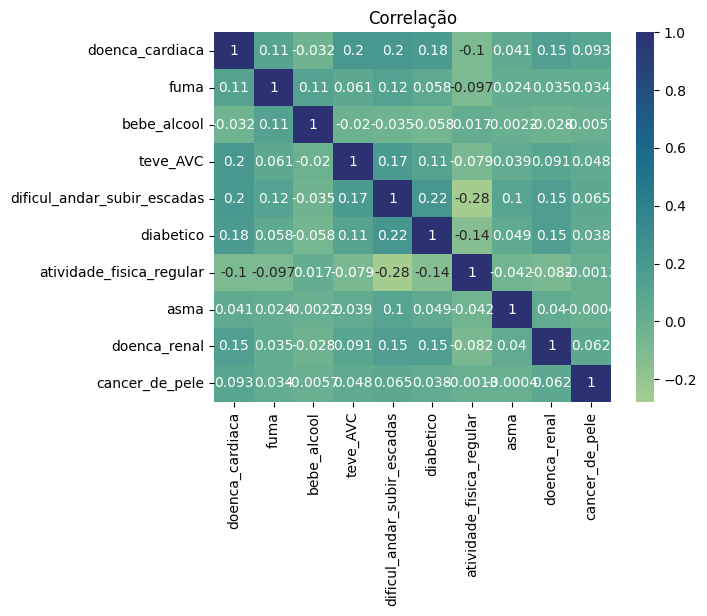

In [33]:
# Plotando um gráfico da correlação dos dados e seus pesos
import seaborn as sns
ax = sns.heatmap(df.corr(), annot=True,cmap="crest")
ax.set_title('Correlação')
ax = ax

# transformando as colunas

In [34]:
df.head(5)

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele,IMC_grau
0,0,1,0,0,0,Female,55-59,1,1,1,0,1,baixo_peso
1,0,0,0,1,0,Female,80 or older,0,1,0,0,0,eutrofia(peso_adequado)
2,0,1,0,0,0,Male,65-69,1,1,1,0,0,sobrepeso
3,0,0,0,0,0,Female,75-79,0,0,0,0,1,eutrofia(peso_adequado)
4,0,0,0,0,1,Female,40-44,0,1,0,0,0,eutrofia(peso_adequado)


In [35]:
dados_dumie = pd.get_dummies(df)
# no drop coloca a coluna que não deseja que seja modificada com get_dummies axis=' coluna'

In [36]:
dados_dumie.columns

Index(['doenca_cardiaca', 'fuma', 'bebe_alcool', 'teve_AVC',
       'dificul_andar_subir_escadas', 'diabetico', 'atividade_fisica_regular',
       'asma', 'doenca_renal', 'cancer_de_pele', 'sexo_Female', 'sexo_Male',
       'IdadeCategoria_18-24', 'IdadeCategoria_25-29', 'IdadeCategoria_30-34',
       'IdadeCategoria_35-39', 'IdadeCategoria_40-44', 'IdadeCategoria_45-49',
       'IdadeCategoria_50-54', 'IdadeCategoria_55-59', 'IdadeCategoria_60-64',
       'IdadeCategoria_65-69', 'IdadeCategoria_70-74', 'IdadeCategoria_75-79',
       'IdadeCategoria_80 or older', 'IMC_grau_baixo_peso',
       'IMC_grau_eutrofia(peso_adequado)', 'IMC_grau_obesidade_extrema',
       'IMC_grau_obesidade_grau_1', 'IMC_grau_obesidade_grau_2',
       'IMC_grau_sobrepeso'],
      dtype='object')

In [37]:
dados_dumie.head(1)

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele,...,IdadeCategoria_65-69,IdadeCategoria_70-74,IdadeCategoria_75-79,IdadeCategoria_80 or older,IMC_grau_baixo_peso,IMC_grau_eutrofia(peso_adequado),IMC_grau_obesidade_extrema,IMC_grau_obesidade_grau_1,IMC_grau_obesidade_grau_2,IMC_grau_sobrepeso
0,0,1,0,0,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [38]:
dados_dumie.isna().sum()

doenca_cardiaca                     0
fuma                                0
bebe_alcool                         0
teve_AVC                            0
dificul_andar_subir_escadas         0
diabetico                           0
atividade_fisica_regular            0
asma                                0
doenca_renal                        0
cancer_de_pele                      0
sexo_Female                         0
sexo_Male                           0
IdadeCategoria_18-24                0
IdadeCategoria_25-29                0
IdadeCategoria_30-34                0
IdadeCategoria_35-39                0
IdadeCategoria_40-44                0
IdadeCategoria_45-49                0
IdadeCategoria_50-54                0
IdadeCategoria_55-59                0
IdadeCategoria_60-64                0
IdadeCategoria_65-69                0
IdadeCategoria_70-74                0
IdadeCategoria_75-79                0
IdadeCategoria_80 or older          0
IMC_grau_baixo_peso                 0
IMC_grau_eut

In [39]:
dados_dumie.isnull().sum()

doenca_cardiaca                     0
fuma                                0
bebe_alcool                         0
teve_AVC                            0
dificul_andar_subir_escadas         0
diabetico                           0
atividade_fisica_regular            0
asma                                0
doenca_renal                        0
cancer_de_pele                      0
sexo_Female                         0
sexo_Male                           0
IdadeCategoria_18-24                0
IdadeCategoria_25-29                0
IdadeCategoria_30-34                0
IdadeCategoria_35-39                0
IdadeCategoria_40-44                0
IdadeCategoria_45-49                0
IdadeCategoria_50-54                0
IdadeCategoria_55-59                0
IdadeCategoria_60-64                0
IdadeCategoria_65-69                0
IdadeCategoria_70-74                0
IdadeCategoria_75-79                0
IdadeCategoria_80 or older          0
IMC_grau_baixo_peso                 0
IMC_grau_eut

In [40]:
# Junção dos dados transformados com o que já tínhamos
dados_final = pd.concat([df, dados_dumie], axis=1)
dados_final.head(5)

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,sexo,IdadeCategoria,diabetico,atividade_fisica_regular,asma,...,IdadeCategoria_65-69,IdadeCategoria_70-74,IdadeCategoria_75-79,IdadeCategoria_80 or older,IMC_grau_baixo_peso,IMC_grau_eutrofia(peso_adequado),IMC_grau_obesidade_extrema,IMC_grau_obesidade_grau_1,IMC_grau_obesidade_grau_2,IMC_grau_sobrepeso
0,0,1,0,0,0,Female,55-59,1,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,Female,80 or older,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0,1,0,0,0,Male,65-69,1,1,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,Female,75-79,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,1,Female,40-44,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
# Removendo as features
dados_final.drop(columns=['sexo', 'IdadeCategoria'], inplace=True)
dados_final.head(2)
#dados_final.to_csv('dados_final.csv', index=False)

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele,...,IdadeCategoria_65-69,IdadeCategoria_70-74,IdadeCategoria_75-79,IdadeCategoria_80 or older,IMC_grau_baixo_peso,IMC_grau_eutrofia(peso_adequado),IMC_grau_obesidade_extrema,IMC_grau_obesidade_grau_1,IMC_grau_obesidade_grau_2,IMC_grau_sobrepeso
0,0,1,0,0,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# Selecionando X% do dataframe de maneira aleatória

Resolvi selecionar devido a demora em rodar os modelos mais complexos, teve modelo de mais de 30 min para processar

In [42]:
frac=1
print(dados_dumie.shape)
dados_dumie = dados_dumie.sample(frac=frac) # selecionando aleatóriamente somente de X% do dataframe
print(dados_dumie.shape)

(319795, 31)
(319795, 31)


# Normalizando os dados com StandardScaler

In [43]:
X = dados_dumie.drop(['doenca_cardiaca'], axis=1)
y = dados_dumie['doenca_cardiaca'] # variável dependente

# se os dados não fossem binários poderia utilizar o standardScaler
# biblioteca para padronizar os dados(deixando todos os valores na mesma escala)

# from sklearn.preprocessing import StandardScaler
# normalizar = StandardScaler()
# x_normalizado = normalizar.fit_transform(X)
# y_normalizado = normalizar.fit_transform(y)# Transformando os dados quando não são totalmente binários
# x_normalizado -> esse resultado seria o X do train_test_split

# Separando dados de Treino e teste

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

O uso de stratify=y ajuda a obter uma divisão equilibrada e mais representativa dos dados, o que pode melhorar o desempenho e a generalização do modelo

#### confusion_matrix

A matriz de confusão é uma tabela que permite extrair métricas que auxiliam na avaliação de modelos de machine learning para classificação — quando a variável resposta é categórica

In [45]:
from sklearn.metrics import confusion_matrix

#### ConfusionMatrixDisplay

Com o modelo ajustado, calculamos as previsões do modelo no conjunto de dados de teste. Essas previsões são usadas para calcular a matriz de confusão que é plotada com oConfusionMatrixDisplay

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Plot non-normalized confusion matrix
def display(modelo):
    titles_options = [("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true")]

    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            modelo,
            X_test,
            y_test,
            cmap='Blues',
            normalize=normalize,
        )
        disp.ax_.set_title(title)
#         print(title)
#         print(disp.confusion_matrix)

    plt.show()

### accuracy_score

In [47]:
from sklearn.metrics import accuracy_score

A função accuracy_score() é uma função da biblioteca sklearn.metrics do Python que calcula a pontuação de acurácia para um conjunto de rótulos previstos em relação aos rótulos verdadeiros

### precision_score

precision_score é uma função da biblioteca Scikit-learn que calcula a precisão do modelo de classificação. A precisão é a razão tp / (tp + fp), onde tp é o número de verdadeiros positivos e fp é o número de falsos positivos. A precisão é intuitivamente a capacidade do classificador de não rotular como positiva uma amostra que é negativa.

A função precision_score pode ser usada para calcular a precisão de um modelo de classificação binário ou multiclasse.

In [48]:
from sklearn.metrics import precision_score

### recall_score

recall_score é uma função da biblioteca Scikit-learn que calcula a taxa de verdadeiros positivos do modelo de classificação. A taxa de verdadeiros positivos é a razão tp / (tp + fn), onde tp é o número de verdadeiros positivos e fn é o número de falsos negativos.

A função recall_score pode ser usada para calcular a taxa de verdadeiros positivos de um modelo de classificação binário ou multiclasse.

In [49]:
from sklearn.metrics import recall_score

# Diminuindo código

In [50]:
def metricas(metricas):
    print('O modelo possui {:.2f} % de acerto'.format(accuracy_score(y_test, metricas)*100))
    print('-'*50)
    print('O modelo possui {:.2f} % de precisão'.format(precision_score(y_test, metricas)*100))
    print('-'*50)
    print('O modelo possui {:.2f} % de recall'.format(recall_score(y_test, metricas)*100))
    print('-'*50)
    print('Matriz de confusão')
    print(confusion_matrix(y_test, metricas))
    print('-'*50)

# Classificador KNN

O classificador KNN (K-Nearest Neighbors) é um algoritmo de aprendizado supervisionado que é muito utilizado em problemas
de classificação. Em resumo, o KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância
em relação aos vizinhos mais próximos. O KNN é um dos algoritmos de machine learning mais fáceis de se compreender.

O modelo possui 90.60 % de acerto
--------------------------------------------------
O modelo possui 33.51 % de precisão
--------------------------------------------------
O modelo possui 9.97 % de recall
--------------------------------------------------
Matriz de confusão
[[86102  1625]
 [ 7393   819]]
--------------------------------------------------
489 segundos
--------------------------------------------------


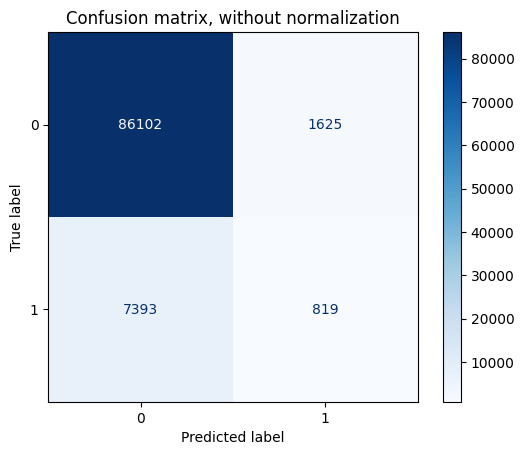

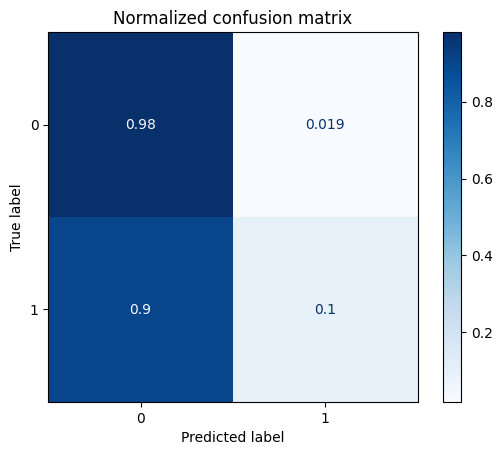

In [51]:
# Biblioteca para criar o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier
inicio = time.time()
# Instanciando o modelo (criamos o modelos ) - por padrão são 5 vizinhos k
knn = KNeighborsClassifier(metric='euclidean',leaf_size = 5)# distância euclideana metric='euclidean'
# treinando o modelo com os dados de treino
knn.fit(X_train, y_train)
# testanto o modelo com os dados de teste
predito_knn = knn.predict(X_test)

metricas(predito_knn)

final = time.time()
tempo_knn = final - inicio
print('%.0f segundos' % tempo_knn)
print('-'*50)
display(knn) # demorando demais

# Modelo Classificação de vetores de suporte linear 'LinearSVC'

Classificação de vetores de suporte linear.

Semelhante ao SVC com o parâmetro kernel='linear', mas implementado em termos de liblinear em vez de libsvm, portanto, tem mais flexibilidade na escolha de penalidades e funções de perda e deve ser melhor dimensionado para grandes números de amostras.

Essa classe suporta entrada densa e esparsa e o suporte multiclasse é tratado de acordo com um esquema um contra o resto.

O modelo possui 91.52 % de acerto
--------------------------------------------------
O modelo possui 60.05 % de precisão
--------------------------------------------------
O modelo possui 2.69 % de recall
--------------------------------------------------
Matriz de confusão
[[87580   147]
 [ 7991   221]]
--------------------------------------------------
9 segundos
--------------------------------------------------


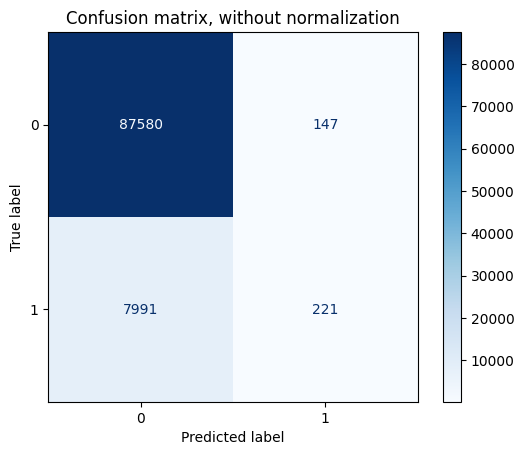

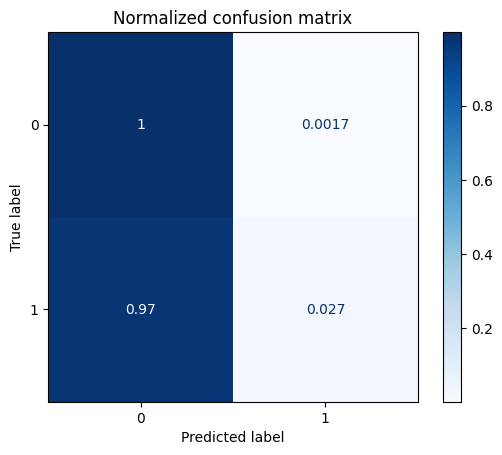

In [52]:
from sklearn.svm import LinearSVC
inicio = time.time()

LinearSVC = LinearSVC(random_state=10)
LinearSVC.fit(X_train, y_train)
previsao_LinearSVC = LinearSVC.predict(X_test)

metricas(previsao_LinearSVC)

final = time.time()
tempo_LinearSVC = final - inicio
print('%.0f segundos' % tempo_LinearSVC)
print('-'*50)
display(LinearSVC)

# Modelo de Regressão Logística

Classificador de regressão logística (também conhecido como logit, MaxEnt).

O modelo possui 91.46 % de acerto
--------------------------------------------------
O modelo possui 50.69 % de precisão
--------------------------------------------------
O modelo possui 7.62 % de recall
--------------------------------------------------
Matriz de confusão
[[87118   609]
 [ 7586   626]]
--------------------------------------------------
3 segundos
--------------------------------------------------


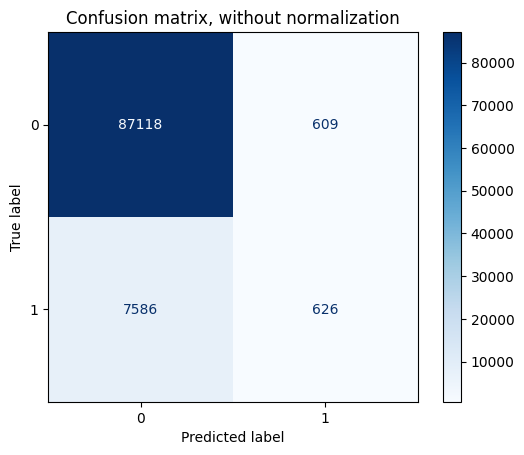

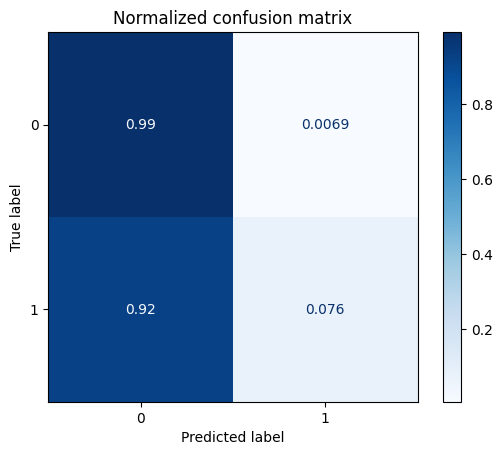

In [53]:
from sklearn.linear_model import LogisticRegression
inicio = time.time()

LogisticRegression = LogisticRegression(random_state=10)
LogisticRegression.fit(X_train, y_train)
previsao_LogisticRegression = LogisticRegression.predict(X_test)

metricas(previsao_LogisticRegression)

final = time.time()
tempo_LogisticRegression = final - inicio
print('%.0f segundos' % tempo_LogisticRegression)
print('-'*50)
display(LogisticRegression)

# Modelo de rede neurais feedforward de classificação

Classificador Perceptron multicamada.

Este modelo otimiza a função log-loss usando LBFGS ou gradiente descendente estocástico.

O modelo possui 91.42 % de acerto
--------------------------------------------------
O modelo possui 49.11 % de precisão
--------------------------------------------------
O modelo possui 7.05 % de recall
--------------------------------------------------
Matriz de confusão
[[87127   600]
 [ 7633   579]]
--------------------------------------------------
73 segundos
--------------------------------------------------


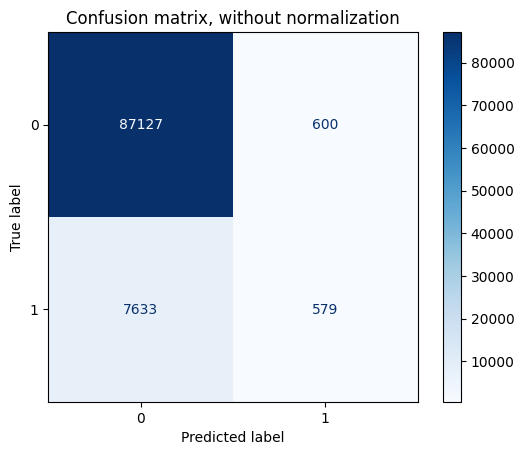

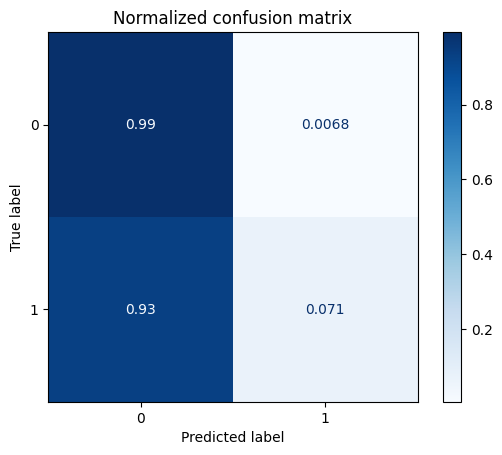

In [54]:
from sklearn.neural_network import MLPClassifier
inicio = time.time()

MLPClassifier = MLPClassifier(random_state=10)
MLPClassifier.fit(X_train, y_train)
previsao_MLPClassifier = MLPClassifier.predict(X_test)

metricas(previsao_MLPClassifier)

final = time.time()
tempo_MLPClassifier = final - inicio
print('%.0f segundos' % tempo_MLPClassifier)
print('-'*50)
display(MLPClassifier)

# Modelo Bernoulli Naive Bayes

Classificador Naive Bayes para modelos multivariados de Bernoulli.

Como MultinomialNB, este classificador é adequado para dados discretos. A diferença é que enquanto o MultinomialNB trabalha com contagem de ocorrências, o BernoulliNB é projetado para recursos binários/booleanos.

O modelo possui 89.49 % de acerto
--------------------------------------------------
O modelo possui 36.16 % de precisão
--------------------------------------------------
O modelo possui 29.75 % de recall
--------------------------------------------------
Matriz de confusão
[[83414  4313]
 [ 5769  2443]]
--------------------------------------------------
1 segundos
--------------------------------------------------


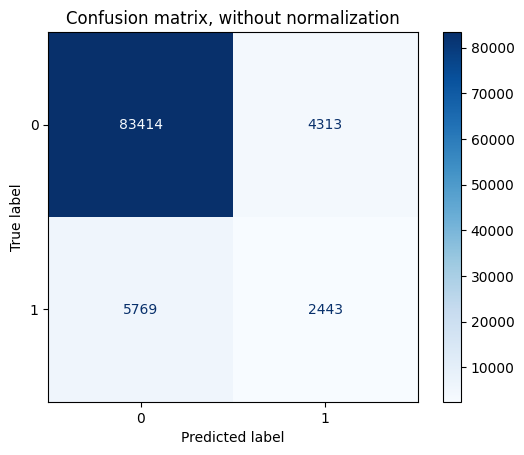

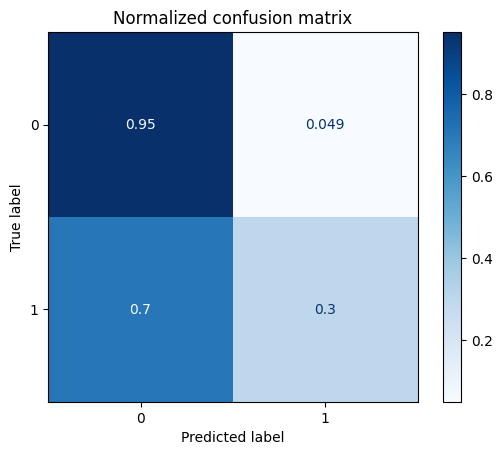

In [55]:
inicio = time.time()
# utilizar mediana, pq é o valor central dos nossos dados ordenados
import numpy as np
np.median(X_train)
# Biblioteca para criar o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# criando o modelo
bnb = BernoulliNB(binarize=np.median(X_train))
# o binarize define o limite para transformar o valor em binário ou não
# define que acima desse valor transforma em 1 e abaixo em 0
bnb.fit(X_train, y_train)# transformando y train em um array unidimensional
previsao_Bnb = bnb.predict(X_test)

metricas(previsao_Bnb)

final = time.time()
tempo_Bnb = final - inicio
print('%.0f segundos' % tempo_Bnb)
print('-'*50)
display(bnb)

# HistGradientBoostingClassifier

O HistGradientBoostingClassifier é um classificador de gradient boosting baseado em histograma que usa o algoritmo de boosting para adicionar modelos de árvore a um conjunto sequencialmente. Cada modelo de árvore adicionado ao conjunto tenta corrigir os erros de previsão cometidos pelos modelos de árvore já presentes no conjunto.
Árvore de classificação de aumento de gradiente baseada em histograma.
Este estimador é muito mais rápido do que GradientBoostingClassifier para grandes conjuntos de dados (n_samples >= 10 000)

O modelo possui 91.48 % de acerto
--------------------------------------------------
O modelo possui 52.34 % de precisão
--------------------------------------------------
O modelo possui 5.18 % de recall
--------------------------------------------------
Matriz de confusão
[[87340   387]
 [ 7787   425]]
--------------------------------------------------
7 segundos
--------------------------------------------------


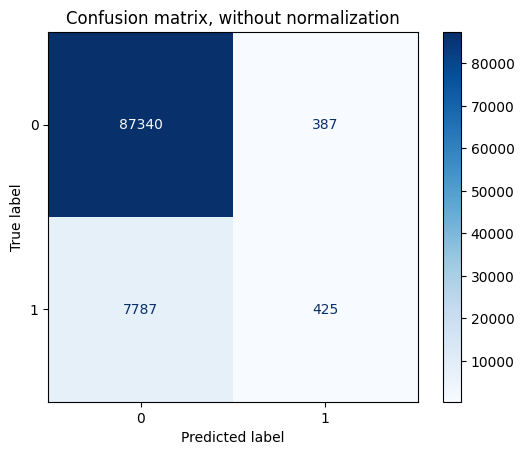

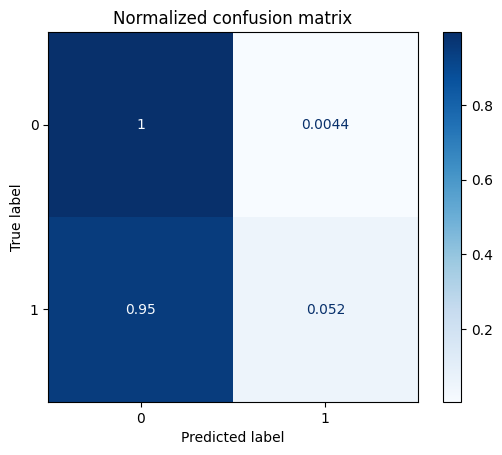

In [56]:
from sklearn.ensemble import HistGradientBoostingClassifier

inicio = time.time()

BoostingClassifier = HistGradientBoostingClassifier(max_depth=5,random_state=10)
BoostingClassifier.fit(X_train,y_train)
previsao_HistGradientBoostingClassifier = BoostingClassifier.predict(X_test)

metricas(previsao_HistGradientBoostingClassifier)

final = time.time()
tempo_HistGradientBoostingClassifier = final - inicio
print('%.0f segundos' % tempo_HistGradientBoostingClassifier)
print('-'*50)
display(BoostingClassifier)

# AdaBoostClassifier

O AdaBoostClassifier é um meta-estimador que começa colocando um classificador no conjunto de dados original e depois encaixa cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados de modo que os classificadores subsequentes se concentrem mais nos casos difíceis.
Esta classe implementa o algoritmo conhecido como AdaBoost-SAMME

O modelo possui 91.42 % de acerto
--------------------------------------------------
O modelo possui 49.48 % de precisão
--------------------------------------------------
O modelo possui 8.67 % de recall
--------------------------------------------------
Matriz de confusão
[[87000   727]
 [ 7500   712]]
--------------------------------------------------
8 segundos
--------------------------------------------------


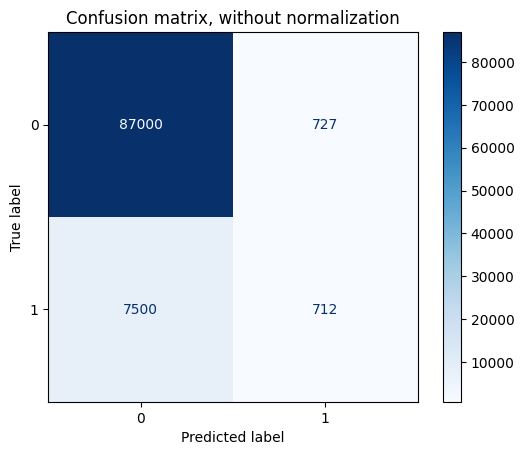

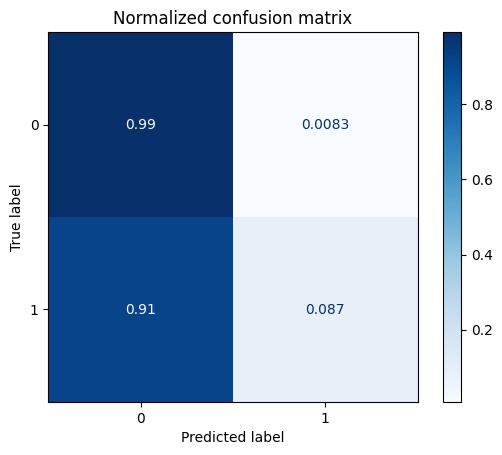

In [57]:
from sklearn.ensemble import AdaBoostClassifier

inicio = time.time()

AdaBoostClassifier = AdaBoostClassifier(random_state=10)
AdaBoostClassifier.fit(X_train,y_train)
previsao_AdaBoostClassifier = AdaBoostClassifier.predict(X_test)

metricas(previsao_AdaBoostClassifier)

final = time.time()
tempo_AdaBoostClassifier = final - inicio
print('%.0f segundos' % tempo_AdaBoostClassifier)
print('-'*50)
display(AdaBoostClassifier)

# GaussianProcessClassifier

O GaussianProcessClassifier é um classificador de processo gaussiano que implementa a classificação de propagação de incerteza usando o processo gaussiano.

O modelo GaussianProcessClassifier possui 92.08 % de acerto
--------------------------------------------------
O modelo GaussianProcessClassifier possui 0.00 % de precisão
--------------------------------------------------
O modelo GaussianProcessClassifier possui 0.00 % de recall
--------------------------------------------------
Matriz de confusão
[[861   0]
 [ 98   0]]
--------------------------------------------------
7 segundos
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


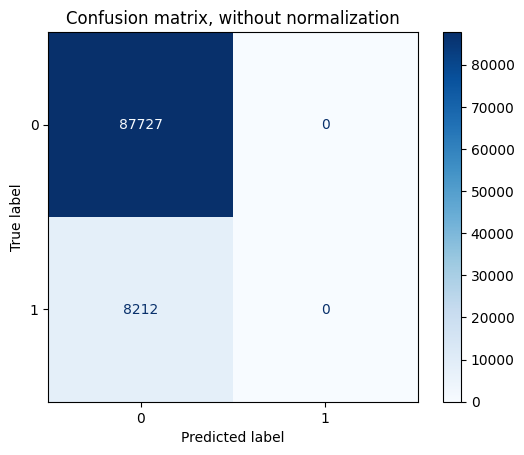

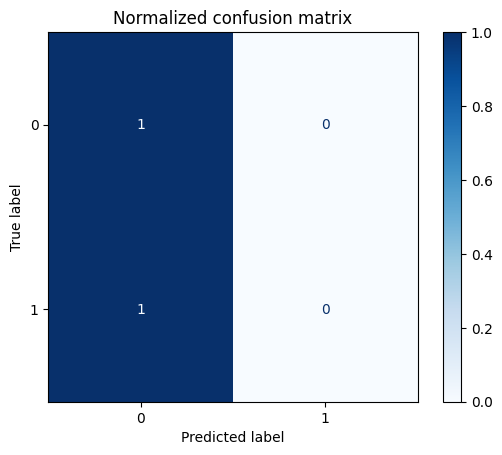

In [58]:
from sklearn.gaussian_process import GaussianProcessClassifier

inicio = time.time()

gpc = GaussianProcessClassifier(random_state=10)
gpc.fit(X_train.sample(frac=0.01),y_train.sample(frac=0.01))
previsao_gpc = gpc.predict(X_test.sample(frac=0.01))

print('O modelo GaussianProcessClassifier possui {:.2f} % de acerto'.format(accuracy_score(y_test.sample(frac=0.01), previsao_gpc)*100))
print('-'*50)
print('O modelo GaussianProcessClassifier possui {:.2f} % de precisão'.format(precision_score(y_test.sample(frac=0.01), previsao_gpc)*100))
print('-'*50)
print('O modelo GaussianProcessClassifier possui {:.2f} % de recall'.format(recall_score(y_test.sample(frac=0.01), previsao_gpc)*100))
print('-'*50)
print('Matriz de confusão')
print(confusion_matrix(y_test.sample(frac=0.01), previsao_gpc))
print('-'*50)

final = time.time()
tempo_gpc = final - inicio
print('%.0f segundos' % tempo_gpc)
print('-'*50)
display(gpc)

In [59]:
# o meu computador não possui memória suficiente para rodar o modelo GaussianProcessClassifier
# max_iter_predict int, padrão=100, valores menores reduzem o custo do modelo mas resultados piores

# Árvorde de decisão de classificação

Um classificador de árvore de decisão

Árvore de decisão é um mapa ou algoritmo que mostra os possíveis resultados de uma série de escolhas ou ações relacionadas. Ela permite comparar as alternativas com base em seus custos, probabilidades e benefícios, e visualizar as múltiplas etapas e consequências de cada decisão. A árvore de decisão é uma ferramenta de representação visual que pode ajudar uma pessoa ou organização a visualizar as ramificações e consequências de uma ação, auxiliando na tomada de decisão

O modelo possui 91.47 % de acerto
--------------------------------------------------
O modelo possui 55.06 % de precisão
--------------------------------------------------
O modelo possui 1.79 % de recall
--------------------------------------------------
Matriz de confusão
[[87607   120]
 [ 8065   147]]
--------------------------------------------------
0 segundos
--------------------------------------------------


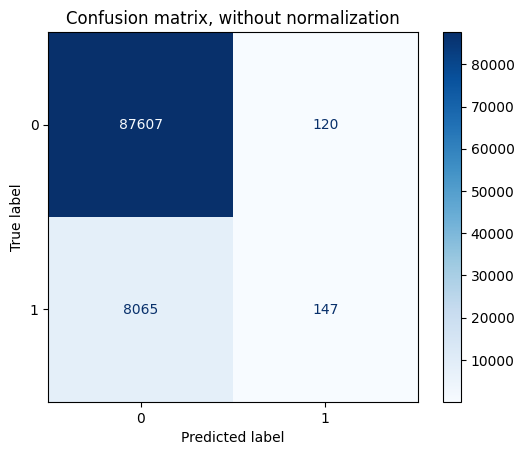

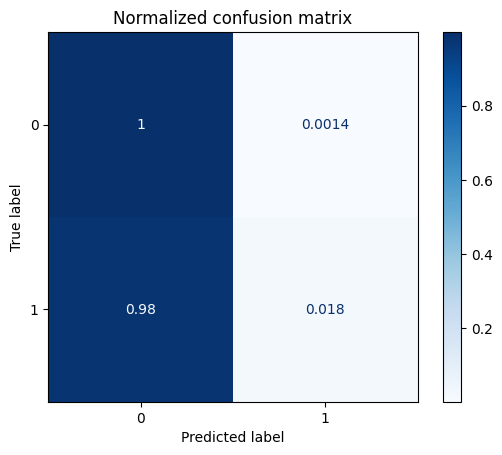

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
inicio = time.time()
tree = DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=4) # maximo de 5 ligações
tree.fit(X_train, y_train)
previsao_arvoredecisao = tree.predict(X_test)

metricas(previsao_arvoredecisao)

final = time.time()
tempo_tree = final - inicio
print('%.0f segundos' % tempo_tree)
print('-'*50)
display(tree)

# Random Forest Classifier

Um classificador de floresta aleatória

O classificador de floresta aleatória é um algoritmo de aprendizado de máquina que utiliza várias árvores de decisão para realizar previsões. Cada árvore é construída com um subconjunto aleatório dos dados de treinamento e cada árvore é independente das outras. A previsão final é feita pela agregação das previsões de todas as árvores. O classificador de floresta aleatória é usado em muitas aplicações, incluindo reconhecimento de fala, detecção de fraude e diagnóstico médico.

Mensagem recebida. O classificador de floresta aleatória é um algoritmo de aprendizado de máquina que utiliza várias árvores de decisão para realizar previsões. Cada árvore é construída com um subconjunto aleatório dos dados de treinamento e cada árvore é independente das outras. A previsão final é feita pela agregação das previsões de todas as árvores. O classificador de floresta aleatória é usado em muitas aplicações, incluindo reconhecimento de fala, detecção de fraude e diagnóstico médico.

O modelo possui 91.45 % de acerto
--------------------------------------------------
O modelo possui 69.23 % de precisão
--------------------------------------------------
O modelo possui 0.11 % de recall
--------------------------------------------------
Matriz de confusão
[[87723     4]
 [ 8203     9]]
--------------------------------------------------
7 segundos
--------------------------------------------------


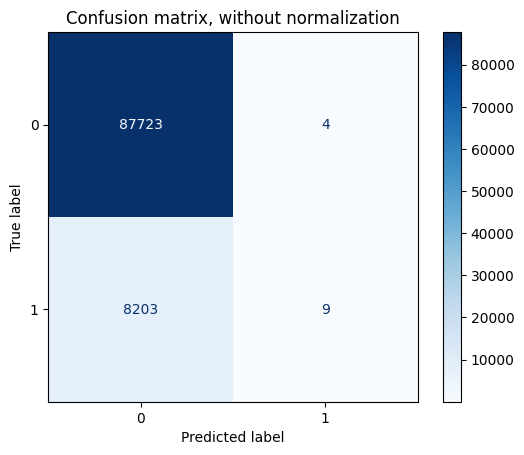

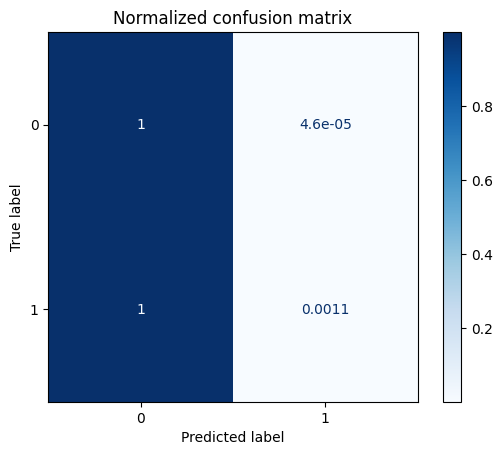

In [61]:
from sklearn.ensemble import RandomForestClassifier
inicio = time.time()
RFC = RandomForestClassifier(n_estimators=100, random_state=10, max_depth=5)
RFC.fit(X_train,y_train)
previsao_RFC = RFC.predict(X_test)

metricas(previsao_RFC)

final = time.time()
tempo_randomForest = final - inicio
print('%.0f segundos' % tempo_randomForest)
print('-'*50)
display(RFC)

## Selecionar as melhores variáveis: tentar reduzir as variáveis sem comprometer o modelo

# SelectKBest

SelectKBest é uma classe da biblioteca Scikit-learn que permite selecionar as melhores features de um dataset com base em um teste estatístico. A classe SelectKBest pontua os recursos usando uma função (nesse caso, f_classif ou chi2) e, em seguida, remove todos os recursos de pontuação mais altos, exceto os k, os dois são utilizados para classificação.

In [62]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#### f_classif

f_classif é uma função da biblioteca Scikit-learn que calcula o valor F ANOVA para a amostra fornecida. O valor F ANOVA é uma medida estatística que determina se as médias de dois ou mais grupos são iguais.
Em outras palavras, f_classif é um teste estatístico que é adequado quando os dados são numéricos e a variável alvo é categórica. Ele é usado em conjunto com a classe SelectKBest para selecionar as melhores features de um dataset.
Em estatística, uma variável categórica é uma variável que pode assumir apenas um número limitado, e geralmente fixo, de valores possíveis, atribuindo cada indivíduo ou outra unidade de observação a um determinado grupo ou categoria nominal com base em alguma propriedade qualitativa. Por exemplo, gênero, tipo de material e método de pagamento são exemplos de variáveis categóricas

In [63]:
X = dados_dumie.drop(['doenca_cardiaca'], axis=1)
y = dados_dumie['doenca_cardiaca']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

inicio = time.time()

melhores_f_classif = SelectKBest(f_classif, k=6)# reduzindo para 6 variáveis
melhores_f_classif.fit(X_train,y_train)
# transformando e selecionando 6 variáveis
treino_kbest_f_classif = melhores_f_classif.transform(X_train)
teste_kbest_f_classif = melhores_f_classif.transform(X_test)

X_new = SelectKBest(chi2, k=6).fit_transform(X, y)
print('Reduzindo o modelo a {} => (linhas, colunas)'.format(X_new.shape))

# RandomForestClassifier com modelo reduzido a 6 colunas
RFC_f_classif = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=5)
RFC_f_classif.fit(treino_kbest_f_classif,y_train)
previsao_RFC_f_classif = RFC_f_classif.predict(teste_kbest_f_classif)
# calculando a acurácia
print('-'*50)
print('A Acurácia do modelo RandomForestClassifier com f_classif com 6 features é de {:.2f} %'
      .format(RFC_f_classif.score(teste_kbest_f_classif,y_test)*100))
print('='*50)

# árvore de decisão com modelo reduzido a 4 colunas
DTC_f_classif = DecisionTreeClassifier(random_state=10,max_depth=5)
DTC_f_classif.fit(treino_kbest_f_classif,y_train)
previsao_DTC_f_classif = DTC_f_classif.predict(teste_kbest_f_classif)
# calculando a acurácia
print('A Acurácia do modelo DecisionTreeClassifier com f_classif com 6 features é de {:.2f} %'
      .format(DTC_f_classif.score(teste_kbest_f_classif,y_test)*100))
print('='*50)

final = time.time()
tempo_previsao_DTC_RFC_f_classif = final - inicio
print('%.0f segundos' % tempo_previsao_DTC_RFC_f_classif)

Reduzindo o modelo a (319795, 6) => (linhas, colunas)
--------------------------------------------------
A Acurácia do modelo RandomForestClassifier com f_classif com 6 features é de 91.39 %
A Acurácia do modelo DecisionTreeClassifier com f_classif com 6 features é de 91.35 %
6 segundos


In [64]:
RFC_f_classif.n_features_in_

6

In [65]:
RFC_f_classif.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=5, random_state=10)>

#### chi2

O SelectKBest é uma função da biblioteca scikit-learn que seleciona as k melhores features de acordo com um score_func passado como parâmetro. O score_func é uma função que calcula a relevância de cada feature para o modelo e pode ser escolhido pelo usuário. O chi2 é um dos score_funcs disponíveis e é usado para calcular a independência entre cada feature e a variável alvo em problemas de classificação

In [66]:
X = dados_dumie.drop(['doenca_cardiaca'], axis=1)
y = dados_dumie['doenca_cardiaca']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

inicio = time.time()

melhores_chi2 = SelectKBest(chi2, k=6)# reduzindo para 6 variáveis
melhores_chi2.fit(X_train,y_train)
# transformando e selecionando 6 variáveis
treino_kbest_chi2 = melhores_chi2.transform(X_train)
teste_kbest_chi2 = melhores_chi2.transform(X_test)

X_new = SelectKBest(chi2, k=4).fit_transform(X, y)
print('Reduzindo o modelo a {} => (linhas, colunas)'.format(X_new.shape))

# RandomForestClassifier com modelo reduzido a 6 variáveis
RFC_chi2 = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=5)
RFC_chi2.fit(treino_kbest_chi2,y_train)
previsao_RFC_chi2 = RFC_chi2.predict(teste_kbest_chi2)
# calculando a acurácia
print('A Acurácia do modelo RandomForestClassifier com f_classif com 6 features é de {:.2f} %'
      .format(RFC_chi2.score(teste_kbest_chi2,y_test)*100))

# árvore de decisão com modelo reduzido a 6 colunas

DTC_chi2 = DecisionTreeClassifier(random_state=10,max_depth=5)
DTC_chi2.fit(treino_kbest_chi2,y_train)
previsao_DTC_chi2 = DTC_chi2.predict(teste_kbest_chi2)
# calculando a acurácia
print('A Acurácia do modelo DecisionTreeClassifier com f_classif com 6 features é de {:.2f} %'
      .format(DTC_chi2.score(teste_kbest_chi2,y_test)*100))

final = time.time()
tempo_previsao_DTC_RFC_chi2 = final - inicio
print('%.0f segundos' % tempo_previsao_DTC_RFC_chi2)

Reduzindo o modelo a (319795, 4) => (linhas, colunas)
A Acurácia do modelo RandomForestClassifier com f_classif com 6 features é de 91.48 %
A Acurácia do modelo DecisionTreeClassifier com f_classif com 6 features é de 91.49 %
5 segundos


# Seleção das variáveis com RFECV

RFECV é uma classe em Python que faz parte do pacote scikit-learn. Ela é usada para selecionar as melhores características em um conjunto de dados usando a eliminação recursiva de características (RFE) com validação cruzada (CV).

A eliminação recursiva de características é um método para selecionar as melhores características em um conjunto de dados, eliminando iterativamente as menos importantes e recalculando o modelo com as características restantes.

A validação cruzada é uma técnica para avaliar o desempenho do modelo em dados não vistos. Ela divide o conjunto de dados em k partes iguais e usa k-1 partes para treinar o modelo e a parte restante para testá-lo.

cv = 5 o padrão
step = 1 Se for maior ou igual a 1, então step corresponde ao número (inteiro) de feições a serem removidas a cada iteração. Se estiver dentro de (0,0, 1,0), então stepcorresponde à porcentagem (arredondada para baixo) de feições a serem removidas em cada iteração. Observe que a última iteração pode remover menos de step recursos para alcançar min_features_to_select.
scoring = utilizando a aacurácia como referência.

In [67]:
# Maximizando o modelo com RFECV, porém consome mais recursos computacionais
from sklearn.feature_selection import RFECV
inicio = time.time()
min_features_to_select = 1
estimator = RandomForestClassifier(n_estimators=100, random_state=10, max_depth=5)
selector_RFECV = RFECV(estimator, step=1, cv=5,scoring='accuracy',min_features_to_select = min_features_to_select)
selector_RFECV =selector_RFECV.fit(X_train, y_train)
previsao_RFEC = selector_RFECV.predict(X_test)

final = time.time()
tempo_RFECV = final - inicio
print('%.0f segundos' % tempo_RFECV)

822 segundos


In [68]:
selector_RFECV.cv_results_

{'mean_test_score': array([0.9144048 , 0.9144048 , 0.91461922, 0.91490512, 0.91483811,
        0.91509721, 0.91510614, 0.91510167, 0.91530716, 0.91512401,
        0.91486491, 0.91489172, 0.91476664, 0.91466836, 0.91465049,
        0.91484258, 0.91474877, 0.91473983, 0.9147577 , 0.91466836,
        0.91461028, 0.91457455, 0.91455221, 0.91448521, 0.91469069,
        0.91469963, 0.91458795, 0.91457455, 0.91451201, 0.9144718 ]),
 'std_test_score': array([8.16947093e-06, 8.16947093e-06, 2.43317738e-04, 8.86550464e-05,
        2.32396794e-04, 1.62454231e-04, 1.32118825e-04, 1.72054257e-04,
        1.21293836e-04, 2.12097655e-04, 2.12013865e-04, 1.79279030e-04,
        1.60764700e-04, 8.55053703e-05, 1.28247663e-04, 1.86428510e-04,
        1.55324597e-04, 1.44587975e-04, 1.64172597e-04, 9.02409339e-05,
        5.12726122e-05, 4.99111552e-05, 5.72038149e-05, 5.72035424e-05,
        1.20888914e-04, 1.02120302e-04, 8.63266248e-05, 6.44650480e-05,
        2.21838883e-05, 2.19757437e-05]),
 'split

In [69]:
media_RFECV = pd.DataFrame(selector_RFECV.cv_results_)
media_RFECV

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.914405,0.000008,0.914388,0.914409,0.914409,0.914409,0.914409
1,0.914405,0.000008,0.914388,0.914409,0.914409,0.914409,0.914409
2,0.914619,0.000243,0.914902,0.914230,0.914565,0.914543,0.914856
3,0.914905,0.000089,0.914902,0.914923,0.915057,0.914789,0.914856
4,0.914838,0.000232,0.914902,0.914454,0.914900,0.914766,0.915168
5,0.915097,0.000162,0.915059,0.914833,0.915079,0.915325,0.915191
6,0.915106,0.000132,0.915126,0.914967,0.915079,0.915012,0.915347
7,0.915102,0.000172,0.915193,0.915191,0.914789,0.915057,0.915280
8,0.915307,0.000121,0.915394,0.915235,0.915101,0.915414,0.915392
9,0.915124,0.000212,0.915237,0.915392,0.914766,0.915034,0.915191


In [70]:
media_RFECV = media_RFECV.mean() # média do modelo
media_RFECV

mean_test_score      0.914742
std_test_score       0.000117
split0_test_score    0.914804
split1_test_score    0.914760
split2_test_score    0.914616
split3_test_score    0.914716
split4_test_score    0.914816
dtype: float64

In [71]:
selector_RFECV.transform(X)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [72]:
selector_RFECV.n_features_ # selecionou 12 variáveis

9

In [73]:
selector_RFECV.support_ # as colunas escolhidas como true

array([ True, False,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [74]:
selector_RFECV.ranking_ # o peso das colunas, quanto mais perto de 1 melhor, mais influencia

array([ 1, 18,  1,  1,  1,  4,  7,  1,  3,  1,  1,  5, 10,  8,  6,  9, 13,
       14, 19, 22, 12,  2,  1,  1, 21, 11, 16, 20, 15, 17])

In [75]:
X.columns[selector_RFECV.support_]

Index(['fuma', 'teve_AVC', 'dificul_andar_subir_escadas', 'diabetico',
       'doenca_renal', 'sexo_Female', 'sexo_Male', 'IdadeCategoria_75-79',
       'IdadeCategoria_80 or older'],
      dtype='object')

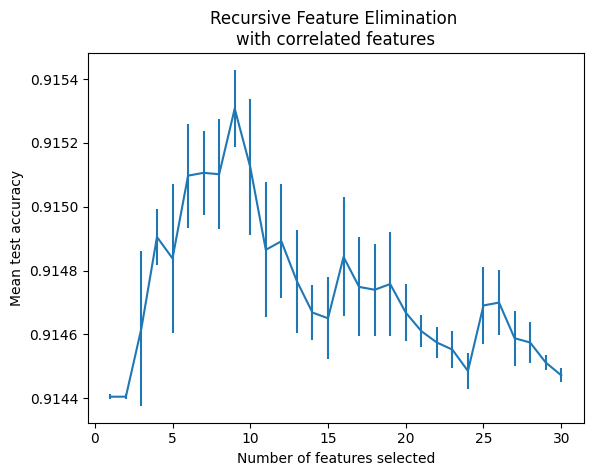

In [76]:
import matplotlib.pyplot as plt

n_scores = len(selector_RFECV.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector_RFECV.cv_results_["mean_test_score"],
    yerr=selector_RFECV.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

# StratifiedKFold

StratifiedKFold é uma classe do Scikit-learn que é uma variação da KFold na qual a principal diferença é que a mesma estratifica os dados de acordo com as classes do problema. Em outras palavras, ela balanceia a quantidade de amostras de cada classe entre as partições. Isso é relevante se o dataset é desbalanceado, algo comum em Machine Learning

In [77]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

inicio = time.time()
min_features_to_select = 1  # Minimum number of features to consider
clf = RandomForestClassifier(random_state=10, max_depth=5)
cv = StratifiedKFold(5)

RFECV_StratifiedKFold = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
RFECV_StratifiedKFold.fit(X_train, y_train)

print(f"Número ideal de features: {RFECV_StratifiedKFold.n_features_}")
final = time.time()
tempo_RFECV_StratifiedKFold_RandomForestClassifier = final - inicio
print('%.0f segundos' % tempo_RFECV_StratifiedKFold_RandomForestClassifier)

Número ideal de features: 9
750 segundos


No presente caso, o modelo com 11 características (que corresponde ao verdadeiro modelo generativo) é considerado o mais ótimo.

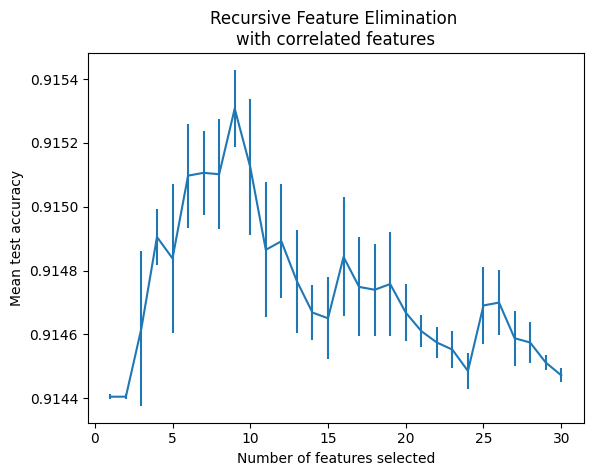

In [78]:
import matplotlib.pyplot as plt

n_scores = len(RFECV_StratifiedKFold.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    RFECV_StratifiedKFold.cv_results_["mean_test_score"],
    yerr=RFECV_StratifiedKFold.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [79]:
RFECV_StratifiedKFold.n_features_ # selecionou 10 variáveis para ter o melhore resultado possível
# print('número de variáveis %.0f' % selector.n_features_)

9

In [80]:
RFECV_StratifiedKFold.support_ # as variáveis que o algoritmo selecionou
# print('Colunas que o algoritmo selecionou %' % selector.support_ )

array([ True, False,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [81]:
X.columns[RFECV_StratifiedKFold.support_] # As variáveis selecionadas
# print('As variáveis(colunas) selecionadas %' % X_train.columns[selector.support_])

Index(['fuma', 'teve_AVC', 'dificul_andar_subir_escadas', 'diabetico',
       'doenca_renal', 'sexo_Female', 'sexo_Male', 'IdadeCategoria_75-79',
       'IdadeCategoria_80 or older'],
      dtype='object')

In [82]:
RFECV_StratifiedKFold.cv_results_

{'mean_test_score': array([0.9144048 , 0.9144048 , 0.91461922, 0.91490512, 0.91483811,
        0.91509721, 0.91510614, 0.91510167, 0.91530716, 0.91512401,
        0.91486491, 0.91489172, 0.91476664, 0.91466836, 0.91465049,
        0.91484258, 0.91474877, 0.91473983, 0.9147577 , 0.91466836,
        0.91461028, 0.91457455, 0.91455221, 0.91448521, 0.91469069,
        0.91469963, 0.91458795, 0.91457455, 0.91451201, 0.9144718 ]),
 'std_test_score': array([8.16947093e-06, 8.16947093e-06, 2.43317738e-04, 8.86550464e-05,
        2.32396794e-04, 1.62454231e-04, 1.32118825e-04, 1.72054257e-04,
        1.21293836e-04, 2.12097655e-04, 2.12013865e-04, 1.79279030e-04,
        1.60764700e-04, 8.55053703e-05, 1.28247663e-04, 1.86428510e-04,
        1.55324597e-04, 1.44587975e-04, 1.64172597e-04, 9.02409339e-05,
        5.12726122e-05, 4.99111552e-05, 5.72038149e-05, 5.72035424e-05,
        1.20888914e-04, 1.02120302e-04, 8.63266248e-05, 6.44650480e-05,
        2.21838883e-05, 2.19757437e-05]),
 'split

In [83]:
media_RFECV_StratifiedKFold = pd.DataFrame(RFECV_StratifiedKFold.cv_results_)
media_RFECV_StratifiedKFold

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.914405,0.000008,0.914388,0.914409,0.914409,0.914409,0.914409
1,0.914405,0.000008,0.914388,0.914409,0.914409,0.914409,0.914409
2,0.914619,0.000243,0.914902,0.914230,0.914565,0.914543,0.914856
3,0.914905,0.000089,0.914902,0.914923,0.915057,0.914789,0.914856
4,0.914838,0.000232,0.914902,0.914454,0.914900,0.914766,0.915168
5,0.915097,0.000162,0.915059,0.914833,0.915079,0.915325,0.915191
6,0.915106,0.000132,0.915126,0.914967,0.915079,0.915012,0.915347
7,0.915102,0.000172,0.915193,0.915191,0.914789,0.915057,0.915280
8,0.915307,0.000121,0.915394,0.915235,0.915101,0.915414,0.915392
9,0.915124,0.000212,0.915237,0.915392,0.914766,0.915034,0.915191


In [84]:
media_RFECV_StratifiedKFold = media_RFECV_StratifiedKFold.mean()
media_RFECV_StratifiedKFold

mean_test_score      0.914742
std_test_score       0.000117
split0_test_score    0.914804
split1_test_score    0.914760
split2_test_score    0.914616
split3_test_score    0.914716
split4_test_score    0.914816
dtype: float64

# RandomizedSearchCV : Busca Aleatória

# KFold

KFold é uma classe da biblioteca sklearn.model_selection que fornece índices de treino/teste para dividir os dados em conjuntos de treino/teste. Ela divide o conjunto de dados em k dobras consecutivas (sem embaralhar por padrão) e retorna os índices de treino/teste para cada dobra

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint

inicio = time.time()

espaco_de_parametros = {
    "max_depth" : [3, 5,7,10,20],
    "min_samples_split" : randint(32,128),# número inteiro aleatório entre()
    "min_samples_leaf" : randint(32,128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True),
                           n_iter = 128,# rodando apenas 128 no meio dos parametros
                          random_state=10)
busca.fit(X_train, y_train)
previsao_Dtc_RandomizedSearchCV = busca.predict(X_test)

resultados = pd.DataFrame(busca.cv_results_)
final = time.time()
tempo_Dtc_RandomizedSearchCV = final - inicio
print('%.0f segundos' % tempo_Dtc_RandomizedSearchCV)

print('O modelo DTC com RandomizedSearchCV possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_Dtc_RandomizedSearchCV)*100))
print('-'*50)
print('O modelo DTC com RandomizedSearchCV possui {:.2f} % de precisão'.format(precision_score(y_test,previsao_Dtc_RandomizedSearchCV)*100))
print('-'*50)
print('O modelo DTC com RandomizedSearchCV possui {:.2f} % de recall'.format(recall_score(y_test,previsao_Dtc_RandomizedSearchCV)*100))
print('-'*50)
print('Matriz de confusão')
print(confusion_matrix(y_test, previsao_Dtc_RandomizedSearchCV))
print('-'*50)
melhor = busca.best_estimator_
print(melhor)
resultados.head()

262 segundos
O modelo DTC com RandomizedSearchCV possui 91.49 % de acerto
--------------------------------------------------
O modelo DTC com RandomizedSearchCV possui 52.73 % de precisão
--------------------------------------------------
O modelo DTC com RandomizedSearchCV possui 5.28 % de recall
--------------------------------------------------
Matriz de confusão
[[87338   389]
 [ 7778   434]]
--------------------------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=44,
                       min_samples_split=114)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.752565,0.185218,0.017296,0.003295,entropy,20,47,96,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.913383,0.916084,0.915258,0.914454,0.914990,0.914834,0.000896,112
1,0.434509,0.007232,0.011791,0.000104,entropy,10,60,121,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.913428,0.916352,0.915883,0.914521,0.915101,0.915057,0.001030,47
2,0.194994,0.001381,0.010345,0.001155,entropy,3,61,40,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.913875,0.916508,0.915995,0.913247,0.914833,0.914892,0.001231,70
3,0.199263,0.009229,0.010736,0.001937,entropy,3,72,68,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.913875,0.916508,0.915995,0.913247,0.914833,0.914892,0.001231,70
4,0.197805,0.005199,0.010192,0.000689,entropy,3,43,86,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.913875,0.916508,0.915995,0.913247,0.914833,0.914892,0.001231,70


In [86]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(busca, X_train, y_train, cv = KFold(n_splits=5, shuffle=True)) # função da outra
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=44,
                       min_samples_split=114)


In [87]:
busca.best_score_

0.915387574944529

In [88]:
busca.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 44,
 'min_samples_split': 114}

In [89]:
from sklearn.model_selection import cross_val_score
inicio = time.time()
print(cross_val_score(busca, X_train, y_train, cv = KFold(n_splits=5, shuffle=True)))
final = time.time()
tempo = final - inicio
print('Tempo %.2f segundos' % tempo)
melhor = busca.best_estimator_
print(melhor)
print('{:.2f} %' .format((busca.best_score_)*100))
print(busca.best_params_)

[0.91675601 0.91632977 0.91443122 0.91387282 0.91543633]
Tempo 1029.14 segundos
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=44,
                       min_samples_split=114)
91.54 %
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 44, 'min_samples_split': 114}


# Customizando o espaço de hiper parâmetros

Validador cruzado de K-Folds

Fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste. Divida o conjunto de dados em k dobras consecutivas (sem embaralhar por padrão).

Cada dobra é então usada uma vez como validação enquanto as k - 1 dobras restantes formam o conjunto de treinamento.

#### Utilizando a árvore de decisão

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint
inicio = time.time()
espaco_de_parametros = {
    "max_depth" : [3,5,10,20,30,None],
    "min_samples_split" : randint(32,128),# número inteiro aleatório entre()
    "min_samples_leaf" : randint(32,128),
    "criterion" : ["gini", "entropy"]
}
# Utilizando a árvore de decisão
busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True),
                           n_iter = 26,# rodando apenas 26 no meio dos parametros
                          random_state=10)
busca.fit(X_train, y_train)
resultados = pd.DataFrame(busca.cv_results_)
final = time.time()
tempo_RandomizedSearchCV_KFold = final - inicio
print('%.0f segundos' % tempo_RandomizedSearchCV_KFold)
resultados.head()

58 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.583745,0.010505,0.014732,0.000188,entropy,None,47,96,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.914969,0.914275,0.914655,0.915146,0.915526,0.914914,0.000426,19
1,0.771708,0.162479,0.018551,0.003481,entropy,20,60,121,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.915081,0.914699,0.914476,0.915146,0.915615,0.915003,0.000393,17
2,0.196816,0.001918,0.010815,0.001102,entropy,3,61,40,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.914723,0.914476,0.914945,0.914632,0.915727,0.914901,0.000440,20
3,0.195262,0.003996,0.010158,0.000609,entropy,3,72,68,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.914723,0.914476,0.914945,0.914632,0.915727,0.914901,0.000440,20
4,0.200153,0.006234,0.010940,0.001593,entropy,3,43,86,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.914723,0.914476,0.914945,0.914632,0.915727,0.914901,0.000440,20


# cross_val_score

Avalie uma pontuação por validação cruzada.

A função cross_val_score é uma função do pacote scikit-learn que treina e testa um modelo em múltiplas dobras do seu conjunto de dados. Esse método de validação cruzada fornece uma melhor compreensão do desempenho do modelo em todo o conjunto de dados em vez de apenas uma divisão única de treinamento/teste. A partir dos resultados, é possível avaliar a qualidade do modelo e ajustar seus hiperparâmetros para melhorar o desempenho.

In [91]:
inicio = time.time()
print(cross_val_score(busca, X_train, y_train, cv = KFold(n_splits=5, shuffle=True)))
final = time.time()
tempo = final - inicio
print('Tempo %.2f segundos' % tempo)
melhor = busca.best_estimator_
print(melhor)
print('{:.2f}%' .format((busca.best_score_)*100))
print(busca.best_params_)

[0.91626463 0.91481093 0.91619575 0.91525764 0.91416319]
Tempo 225.00 segundos
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=101,
                       min_samples_split=45)
91.55%
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 45}


In [92]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=101,
                       min_samples_split=45)


In [93]:
busca.best_score_

0.9154858499541279

In [94]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.915 +-(0.001) {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 45}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 94, 'min_samples_split': 65}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 120, 'min_samples_split': 47}
0.915 +-(0.001) {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 103, 'min_samples_split': 120}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 124, 'min_samples_split': 94}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 110, 'min_samples_split': 81}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 109, 'min_samples_split': 54}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 86, 'min_samples_split': 66}
0.915 +-(0.001) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 82, 'min_samples_split': 77}
0.915 +-(0.001) {'criterion': 'gini', 'max_

### Utilizando o Random Forest Classifier

In [95]:
espaco_de_parametros = {
    'n_estimators':[10,100],
    "max_depth" : [3, 5,7,10],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"],
    'bootstrap': [True, False]
}
inicio = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter=20, # em vez de explorar tudo com o grid, o random vai explorar somente 20 aleatórios
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state=10)
busca.fit(X_train, y_train)
final = time.time()
tempo = final - inicio
print('Tempo %.2f segundos' % tempo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 477.20 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.250579,0.217568,0.065160,0.010449,10,32,64,10,gini,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.915818,0.913493,0.913292,0.918273,0.913605,0.914896,0.001922,4
1,6.230257,0.199655,0.379207,0.073492,100,32,64,5,gini,False,"{'n_estimators': 100, 'min_samples_split': 32,...",0.915528,0.913158,0.912868,0.917737,0.913136,0.914485,0.001890,13
2,4.233125,0.398530,0.240327,0.002199,100,128,128,3,gini,False,"{'n_estimators': 100, 'min_samples_split': 128...",0.915461,0.912979,0.912823,0.917625,0.913136,0.914405,0.001878,18
3,8.446018,0.434157,0.356910,0.016961,100,128,128,7,entropy,False,"{'n_estimators': 100, 'min_samples_split': 128...",0.915773,0.913180,0.913046,0.918027,0.913203,0.914646,0.001975,10
4,0.573034,0.005878,0.040040,0.002748,10,128,64,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.915461,0.913180,0.913046,0.917893,0.913136,0.914543,0.001905,12


In [96]:
inicio = time.time()
print(cross_val_score(busca, X_train, y_train, cv = KFold(n_splits=5, shuffle=True)))
final = time.time()
tempo = final - inicio
print('Tempo %.2f segundos' % tempo)
melhor = busca.best_estimator_
print(melhor)
print('{:.2f} %' .format((busca.best_score_)*100))
print(busca.best_params_)

[0.91528187 0.91530232 0.91595006 0.91416319 0.91472158]
Tempo 1885.01 segundos
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=32,
                       min_samples_split=64)
91.51 %
{'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [97]:
busca.best_score_

0.9150971989338889

In [98]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.915 +-(0.004) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
0.915 +-(0.004) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
0.915 +-(0.004) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
0.915 +-(0.004) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
0.915 +-(0.004) {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
0.915 +-(0.004) {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 7, 'criterion': 'gini', 'bootstrap': False}
0.915 +-(0.004) {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 7, 'criterion': 'gini', 'bootst

# GridSearchCV

O GridSearchCV é uma ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo.
Ele fará de maneira sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará num único objeto.
O GridSearchCV implementa um método "fit" e um método "score".
Ele também implementa "score_samples", "predict", "predict_proba", "decision_function", "transform" e
"inverse_transform" se eles estiverem implementados no estimador usado. Os parâmetros do estimador usado
para aplicar esses métodos são otimizados por pesquisa em grade validada cruzada em uma grade de parâmetros.

In [99]:
inicio = time.time()

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3,5,7],
              'min_samples_leaf':[1,2],
              'min_samples_split':[2,4],
              'n_estimators': [100,200]
             }
grid = GridSearchCV(RandomForestClassifier(random_state=10), param_grid, refit=True, verbose=3,return_train_score=True)

grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   4.4s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   4.2s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   4.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   4.9s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   4.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.914, test=0.914) total time=   8.9s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.914, test=0.914

In [101]:
final = time.time()
tempo_gridsearchcv = final - inicio
print('Tempo %.2f segundos' % tempo_gridsearchcv)

Tempo 1275.19 segundos


O parâmetro refit é usado para ajustar o melhor modelo encontrado pelo GridSearchCV no conjunto de dados completo. Se refit=True (padrão), o GridSearchCV ajustará o melhor modelo encontrado no conjunto de dados completo usando os melhores hiperparâmetros encontrados durante a pesquisa. Se refit=False, o GridSearchCV não ajustará o melhor modelo encontrado no conjunto de dados completo .

In [102]:
grid.best_score_

0.9148961832339193

In [103]:
inicio = time.time()
print(cross_val_score(grid, X_train, y_train, cv = KFold(n_splits=3, shuffle=True)))
final = time.time()
tempo = final - inicio
print('Tempo %.2f segundos' % tempo)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   3.5s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   2.5s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   2.5s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   2.5s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.914, test=0.914) total time=   3.4s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.914, test=0.914) total time=   5.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.914, test=0.914

In [104]:
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [105]:
print('{:.2f} %' .format((grid.best_score_)*100))

91.49 %


In [106]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.915 +-(0.000) {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
0.914 +-(0.000) {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.914 +-(0.000) {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimato

### GroupKFold

O “GroupKFold” é uma variação do “KFold” que tem como objetivo separar os grupos de forma rigorosa para reduzir o fenômeno de overfitting. Cada grupo aparecerá exatamente uma vez no conjunto de teste em todos os folds (o número de grupos distintos deve ser pelo menos igual ao número de folds). O “GroupKFold” é usado quando você tem dados que são agrupados e deseja garantir que os grupos não sejam divididos entre o conjunto de treinamento e o conjunto de teste.
O “GridSearchCV” é uma classe do módulo “sklearn.model_selection” que permite fazer uma busca exaustiva sobre valores de parâmetros especificados para um estimador. A classe é usada para ajustar os hiperparâmetros de um modelo e encontrar a melhor combinação de parâmetros para o modelo. O “GridSearchCV” é usado em conjunto com o “KFold” ou outras estratégias de validação cruzada para avaliar o desempenho do modelo.

In [107]:
from sklearn.model_selection import GroupKFold

In [108]:
dados = pd.read_csv('heart_2020_cleaned.csv', sep=',')
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [109]:
# criando um novo grupo de coluna onde 1 para muito boa, boa e excelente saúde e 0 para ruim e péssima saúde
dados['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [110]:
# trocando os valores da coluna:
def saude(saude):
    if saude == 'Very good':
        return 1
    elif saude == 'Good':
        return 1
    elif saude == 'Excellent':
        return 1
    elif saude == 'Fair':
        return 0
    else:
        return 0

In [111]:
dados['nivel_saude'] = dados['GenHealth'].map(saude)

In [112]:
dados['nivel_saude']

0         1
1         1
2         0
3         1
4         1
         ..
319790    0
319791    1
319792    1
319793    1
319794    1
Name: nivel_saude, Length: 319795, dtype: int64

In [113]:
dados['nivel_saude'].unique()

array([1, 0])

In [114]:
dados_dumie

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele,...,IdadeCategoria_65-69,IdadeCategoria_70-74,IdadeCategoria_75-79,IdadeCategoria_80 or older,IMC_grau_baixo_peso,IMC_grau_eutrofia(peso_adequado),IMC_grau_obesidade_extrema,IMC_grau_obesidade_grau_1,IMC_grau_obesidade_grau_2,IMC_grau_sobrepeso
213572,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
310916,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
83957,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
190320,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
246027,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273383,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
185883,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
251471,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
94936,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [115]:
dados

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,nivel_saude
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,1
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,1
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,1


In [139]:
# selecionando apenas % do dados da coluna nova
print(dados_dumie.shape)
dados_group = dados['nivel_saude'].sample(frac=frac) # selecionando aleatóriamente somente de x% do dataframe
dados_group = pd.DataFrame(dados_group)
print(dados_group.shape)

(319795, 31)
(319795, 1)


In [140]:
dados_group = dados_group.sample(frac=0.7)
print(X_train.shape)
print(dados_group.shape)

(223856, 30)
(223856, 1)


In [141]:
from sklearn.model_selection import GridSearchCV

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64],
    "min_samples_leaf" : [32, 64],
    "criterion" : ["gini", "entropy"]
}

grid_GroupKFold = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 2))
grid_GroupKFold.fit(X_train, y_train, groups=dados_group)
resultados = pd.DataFrame(grid_GroupKFold.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.130760,0.069111,0.044286,0.036604,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.914669,0.914137,0.914403,0.000266,9
1,0.132961,0.072114,0.021863,0.014251,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.914669,0.914137,0.914403,0.000266,9
2,0.132459,0.073732,0.022200,0.014600,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.914669,0.914137,0.914403,0.000266,9
3,0.132017,0.066474,0.022705,0.013990,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.914669,0.914137,0.914403,0.000266,9
4,0.182756,0.110286,0.023151,0.014955,gini,5,32,32,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.915013,0.914137,0.914575,0.000438,5


In [142]:
# buscando o melhor parâmetro
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [143]:
grid.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=10)

In [144]:
print(busca.best_score_ * 100)

91.50971989338889


In [145]:
melhor = busca.best_estimator_
melhor

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=32,
                       min_samples_split=64)

In [146]:
from sklearn.metrics import accuracy_score

# evitar essa abordagem pois estará sendo otimista, apesar de nesse caso esta tendo pouca diferença

predicoes = melhor.predict(X_train)
accuracy = accuracy_score(predicoes, y_train) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 91.53%


In [147]:
# mesmo adicionando nova feature o resultado permanece quase o mesmo, insignificante a mudança

# GridSearchCV com KFold

In [148]:
from sklearn.model_selection import GridSearchCV, KFold

inicio = time.time()

espaco_de_parametros = {
    "max_depth" : [3, 5,7,10],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(random_state=10),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 2, shuffle=True))
busca.fit(X_train, y_train)
resultados = pd.DataFrame(busca.cv_results_)
final = time.time()
tempo = final - inicio
print('Tempo %.2f segundos' % tempo)
resultados.head()

Tempo 36.82 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.207759,0.000822,0.033723,0.001273,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.915347,0.914275,0.914811,0.000536,55
1,0.214497,0.007753,0.032357,0.000070,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.915347,0.914275,0.914811,0.000536,55
2,0.198313,0.005064,0.028728,0.007162,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.915347,0.914275,0.914811,0.000536,55
3,0.127844,0.001469,0.021646,0.000095,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.915347,0.914275,0.914811,0.000536,55
4,0.131388,0.005161,0.021600,0.000187,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.915347,0.914275,0.914811,0.000536,55


In [149]:
busca.best_score_

0.915280358802087

In [150]:
busca.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 128,
 'min_samples_split': 32}

In [151]:
inicio = time.time()
print(cross_val_score(busca, X_train, y_train, cv = KFold(n_splits=5, shuffle=True)))
final = time.time()
tempo = final - inicio
print('Tempo %.2f segundos' % tempo)
melhor = busca.best_estimator_
print(melhor)
print('{:.2f} %' .format((busca.best_score_)*100))
print(busca.best_params_)

[0.91715805 0.91376114 0.91561502 0.91583838 0.9146099 ]
Tempo 143.03 segundos
DecisionTreeClassifier(max_depth=7, min_samples_leaf=128, min_samples_split=32,
                       random_state=10)
91.53 %
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 128, 'min_samples_split': 32}


In [152]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.915 +-(0.001) {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 128, 'min_samples_split': 128}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 128, 'min_samples_split': 64}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 128, 'min_samples_split': 128}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 128, 'min_samples_split': 32}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 128, 'min_samples_split': 64}
0.915 +-(0.001) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 128, 'min_samples_split': 128}
0.915 +-(0.001) {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 128, 'min_samples_split': 128}
0.915 +-(0.001) {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 128, 'min_samples_split': 64}
0.915 +-(0.001) {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 128, 'min_samples_split': 32}
0.915 +-(0.001) {'criterion': 'gini', 'max_d

# Se eu não posso ou não consigo usar cross validation

## StratifiedShuffleSplit

O “sklearn.model_selection.StratifiedShuffleSplit” é um objeto de validação cruzada que fornece índices de treino/teste para dividir os dados em conjuntos de treino/teste. Esse objeto é uma combinação do “StratifiedKFold” e “ShuffleSplit”, que retorna dobras estratificadas aleatórias. As dobras são feitas preservando a porcentagem de amostras para cada classe.

In [153]:
from sklearn.model_selection import StratifiedShuffleSplit

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state=10) # quebrar somente uma vez e colocar 30% dos dados teste

# 30%% dos 80% do teste

inicio = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5, # somente 5 buscas
                    cv = split) # cross validation
busca.fit(X_train, y_train)
final = time.time()
tempo_StratifiedShuffleSplit = final - inicio
print("Tempo %.2f segundos" % tempo_StratifiedShuffleSplit)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 11.44 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,1.017481,0.0,0.104249,0.0,False,gini,4,115,107,22,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.91441,0.91441,0.0,1
1,1.623802,0.0,0.171779,0.0,True,entropy,5,65,94,36,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.91441,0.91441,0.0,1
2,1.819154,0.0,0.206409,0.0,True,entropy,3,50,94,54,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.91441,0.91441,0.0,1
3,2.917387,0.0,0.321347,0.0,True,entropy,3,71,75,89,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.91441,0.91441,0.0,1
4,1.200639,0.0,0.132008,0.0,True,gini,3,98,90,35,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.91441,0.91441,0.0,1


In [154]:
inicio = time.time()
print(cross_val_score(busca, X_train, y_train, cv = split))
fim = time.time()
tempo = fim - inicio
print('Tempo %.2f segundos' % tempo)
melhor = busca.best_estimator_
print(melhor)

[0.91440952]
Tempo 14.07 segundos
RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=115,
                       min_samples_split=107, n_estimators=22)


In [155]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print('%.3f +-(%.3f) %s' % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.914 +-(0.000) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 115, 'min_samples_split': 107, 'n_estimators': 22}
0.914 +-(0.000) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 65, 'min_samples_split': 94, 'n_estimators': 36}
0.914 +-(0.000) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 94, 'n_estimators': 54}
0.914 +-(0.000) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 75, 'n_estimators': 89}
0.914 +-(0.000) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 98, 'min_samples_split': 90, 'n_estimators': 35}


# Parte II - análise com 100% dos dados

# Gridsearchcv

No gridsearchcv os 3 modelos demoraram mais de 1he30min para rodar
1. Gridsearchcv 1500 segundos - acurácia de 91,48%
Parâmetros RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,random_state=10)
2. Gridsearchcv com groupkfold 7 segundos - acurácia de 91,52%
Parâmetros RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,random_state=10)
3. Gridsearchcv com kfold 39 segundos - acurácia de 91,53%
Parâmetros DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=128,min_samples_split=32, random_state=10)

# Randomizedsearchcv

No RandomizedSearchCV os 3 modelos demoraram mais 10min para rodar
1. RandomizedSearchCV com kfold 298 segundos - acurácia de 91,51%
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=34,min_samples_split=120) acurácia de 91,51%  
RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=32,min_samples_split=32) acurácia de 91.49 %

# StratifiedShuffleSplit

35 segundos e acurácia de 91,44%
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=119,min_samples_split=123, n_estimators=70)

# Seleção das variáveis com RFECV

948 segundos
acurácia de 91,47%
selecionou 6 variáveis
Index(['teve_AVC', 'dificul_andar_subir_escadas', 'diabetico', 'doenca_renal',
       'sexo_Male', 'IdadeCategoria_80 or older'] - > estas são as variáveis selecionadas


# 3 melhores modelos de classificação com parâmetros default

In [156]:
# 3. LinearSVC
print("O modelo LinearSVC possui 91.56 % de acerto\n--------------------------------------------------\nO modelo LinearSVC possui 64.57 % de precisão\n--------------------------------------------------\nO modelo LinearSVC possui 3.13 % de recall\n--------------------------------------------------\nMatriz de confusão\n[[87586   141]\n [ 7955   257]]\n--------------------------------------------------\n14 segundos")

O modelo LinearSVC possui 91.56 % de acerto
--------------------------------------------------
O modelo LinearSVC possui 64.57 % de precisão
--------------------------------------------------
O modelo LinearSVC possui 3.13 % de recall
--------------------------------------------------
Matriz de confusão
[[87586   141]
 [ 7955   257]]
--------------------------------------------------
14 segundos


In [157]:
# 2.DecisionTreeClassifier
print("O modelo DecisionTreeClassifier possui 91.51 % de acerto\n--------------------------------------------------\nO modelo DecisionTreeClassifier possui 57.42 % de precisão\n--------------------------------------------------\nO modelo DecisionTreeClassifier possui 3.25 % de recall\n--------------------------------------------------\nMatriz de confusão\n[[87529   198]\n [ 7945   267]]\n--------------------------------------------------\n0 segundos")

O modelo DecisionTreeClassifier possui 91.51 % de acerto
--------------------------------------------------
O modelo DecisionTreeClassifier possui 57.42 % de precisão
--------------------------------------------------
O modelo DecisionTreeClassifier possui 3.25 % de recall
--------------------------------------------------
Matriz de confusão
[[87529   198]
 [ 7945   267]]
--------------------------------------------------
0 segundos


In [158]:
# 1. RandomForestClassifier
print("O modelo RandomForestClassifier possui 91.45 % de acerto\n--------------------------------------------------\nO modelo RandomForestClassifier possui 70.59 % de precisão\n--------------------------------------------------\nO modelo RandomForestClassifier possui 0.15 % de recall\n--------------------------------------------------\nMatriz de confusão\n[[87722     5]\n [ 8200    12]]\n--------------------------------------------------\n8 segundos")

O modelo RandomForestClassifier possui 91.45 % de acerto
--------------------------------------------------
O modelo RandomForestClassifier possui 70.59 % de precisão
--------------------------------------------------
O modelo RandomForestClassifier possui 0.15 % de recall
--------------------------------------------------
Matriz de confusão
[[87722     5]
 [ 8200    12]]
--------------------------------------------------
8 segundos


Nesse caso escolheria a random forest, devido o recall de menos de 1% e a precisão de mais de 70%, a acurácia deu muito similar em todos. O modelo possui menor probabilidade de erros(falso positivos e positivos falsos).

# Otimizando o modelo random forest  classifier

Estes parâmetros foram selecionados no gridsearchcv:

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,random_state=10)

E selecionando as 6 variáveis:

Index(['teve_AVC', 'dificul_andar_subir_escadas', 'diabetico', 'doenca_renal',
       'sexo_Male', 'IdadeCategoria_80 or older']

In [159]:
dados_dumie

,doenca_cardiaca,fuma,bebe_alcool,teve_AVC,dificul_andar_subir_escadas,diabetico,atividade_fisica_regular,asma,doenca_renal,cancer_de_pele,...,IdadeCategoria_65-69,IdadeCategoria_70-74,IdadeCategoria_75-79,IdadeCategoria_80 or older,IMC_grau_baixo_peso,IMC_grau_eutrofia(peso_adequado),IMC_grau_obesidade_extrema,IMC_grau_obesidade_grau_1,IMC_grau_obesidade_grau_2,IMC_grau_sobrepeso
213572,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
310916,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
83957,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
190320,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
246027,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273383,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
185883,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
251471,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
94936,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [160]:
from sklearn.model_selection import train_test_split

X = dados_dumie[['teve_AVC','dificul_andar_subir_escadas','diabetico','doenca_renal','sexo_Male','IdadeCategoria_80 or older']]
y = dados_dumie['doenca_cardiaca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y, shuffle=True)

In [161]:
from sklearn.ensemble import RandomForestClassifier
inicio = time.time()
RFC_otimizado = RandomForestClassifier(max_depth=3, n_estimators=100,random_state=10)
RFC_otimizado.fit(X_train,y_train)
previsao_RFC_otimizado = RFC_otimizado.predict(X_test)

print('O modelo RandomForestClassifier possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_RFC_otimizado)*100))
print('-'*50)
print('O modelo RandomForestClassifier possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_RFC_otimizado)*100))
print('-'*50)
print('O modelo RandomForestClassifier possui {:.2f} % de recall'.format(recall_score(y_test, previsao_RFC_otimizado)*100))
print('-'*50)
print('Matriz de confusão')
print(confusion_matrix(y_test, previsao_RFC_otimizado))
print('-'*50)

final = time.time()
tempo_randomForest_otimizado = final - inicio
print('%.0f segundos' % tempo_randomForest_otimizado)
print('-'*50)

O modelo RandomForestClassifier possui 91.46 % de acerto
--------------------------------------------------
O modelo RandomForestClassifier possui 65.62 % de precisão
--------------------------------------------------
O modelo RandomForestClassifier possui 0.51 % de recall
--------------------------------------------------
Matriz de confusão
[[87705    22]
 [ 8170    42]]
--------------------------------------------------
4 segundos
--------------------------------------------------


# Utilizando os mesmo parâmetros com DecisionTreeClassifier

In [162]:
from sklearn.tree import DecisionTreeClassifier

inicio = time.time()
tree_otimizado = DecisionTreeClassifier(random_state=10, max_depth=3)
tree_otimizado.fit(X_train, y_train)
previsao_arvoredecisao_otimizado = tree_otimizado.predict(X_test)

print('O modelo DecisionTreeClassifier possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_arvoredecisao_otimizado)*100))
print('-'*50)
print('O modelo DecisionTreeClassifier possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_arvoredecisao_otimizado)*100))
print('-'*50)
print('O modelo DecisionTreeClassifier possui {:.2f} % de recall'.format(recall_score(y_test, previsao_arvoredecisao_otimizado)*100))
print('-'*50)
print('Matriz de confusão')
print(confusion_matrix(y_test, previsao_arvoredecisao_otimizado))
print('-'*50)

final = time.time()
tempo_tree_otimizado = final - inicio
print('%.0f segundos' % tempo_tree_otimizado)
print('-'*50)

O modelo DecisionTreeClassifier possui 91.47 % de acerto
--------------------------------------------------
O modelo DecisionTreeClassifier possui 54.81 % de precisão
--------------------------------------------------
O modelo DecisionTreeClassifier possui 1.80 % de recall
--------------------------------------------------
Matriz de confusão
[[87605   122]
 [ 8064   148]]
--------------------------------------------------
0 segundos
--------------------------------------------------


# LinearSVC - otimizado com 6 parâmetros

In [163]:
from sklearn.svm import LinearSVC
inicio = time.time()

LinearSVC_otimizado = LinearSVC(random_state=10)
LinearSVC_otimizado.fit(X_train, y_train)
previsao_LinearSVC_otimizado = LinearSVC_otimizado.predict(X_test)

print('O modelo LinearSVC possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_LinearSVC_otimizado)*100))
print('-'*50)
print('O modelo LinearSVC possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_LinearSVC_otimizado)*100))
print('-'*50)
print('O modelo LinearSVC possui {:.2f} % de recall'.format(recall_score(y_test, previsao_LinearSVC_otimizado)*100))
print('-'*50)
print('Matriz de confusão')
print(confusion_matrix(y_test, previsao_LinearSVC_otimizado))
print('-'*50)

final = time.time()
tempo_LinearSVC_otimizado = final - inicio
print('%.0f segundos' % tempo_LinearSVC_otimizado)
print('-'*50)

O modelo LinearSVC possui 91.48 % de acerto
--------------------------------------------------
O modelo LinearSVC possui 56.27 % de precisão
--------------------------------------------------
O modelo LinearSVC possui 2.24 % de recall
--------------------------------------------------
Matriz de confusão
[[87584   143]
 [ 8028   184]]
--------------------------------------------------
4 segundos
--------------------------------------------------


Depois que os parâmetros foram ajustados a árvore de decisão se igualou a random, porém gasta-se menos recursos

In [164]:
X.columns

Index(['teve_AVC', 'dificul_andar_subir_escadas', 'diabetico', 'doenca_renal',
       'sexo_Male', 'IdadeCategoria_80 or older'],
      dtype='object')

# Previsão

In [169]:
print('legenda:\n1 = sim\n0 = não')
teve_AVC = int(input("Você já teve AVC? "))
dificul_andar_subir_escadas = int(input("Você tem dificuldade para andar ou subir escadas? "))
diabetico = int(input("Você é diabético? "))
doenca_renal = int(input("Você possui doença renal? "))
sexo_Male = int(input("Você é do sexo masculino? "))
IdadeCategoria_80 = int(input("Você possui 80 anos ou mais de idade? "))
entrada = [[teve_AVC, dificul_andar_subir_escadas,diabetico,doenca_renal,sexo_Male,IdadeCategoria_80]]
print('-'*50)
print('RESULTADO')
print('-'*50)
print('   {} baseado no modelo árvore de decisão de classificação'.format(tree_otimizado.predict(entrada)[0]))
print('   {} baseado no modelo Floresta aleatória de classificação'.format(RFC_otimizado.predict(entrada)[0]))
print('   {} baseado no modelo LinearSVC'.format(LinearSVC_otimizado.predict(entrada)[0]))
print('-'*50)
print('Legenda')
print('-'*50)
print(' se 0 você possuí 91% de chance de "não" ter doença cardíaca\n se 1 você possuí 91% de chance de "ter" ou desenvolver doença cardíaca')
print('')
print('')
print('')
print('')

legenda:
1 = sim
0 = não
Você já teve AVC? 0
Você tem dificuldade para andar ou subir escadas? 0
Você é diabético? 0
Você possui doença renal? 0
Você é do sexo masculino? 1
Você possui 80 anos ou mais de idade? 0
--------------------------------------------------
RESULTADO
--------------------------------------------------
   0 baseado no modelo árvore de decisão de classificação
   0 baseado no modelo Floresta aleatória de classificação
   0 baseado no modelo LinearSVC
--------------------------------------------------
Legenda
--------------------------------------------------
 se 0 você possuí 91% de chance de "não" ter doença cardíaca
 se 1 você possuí 91% de chance de "ter" ou desenvolver doença cardíaca






/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


# Plotando Árvore de Decisão

In [166]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

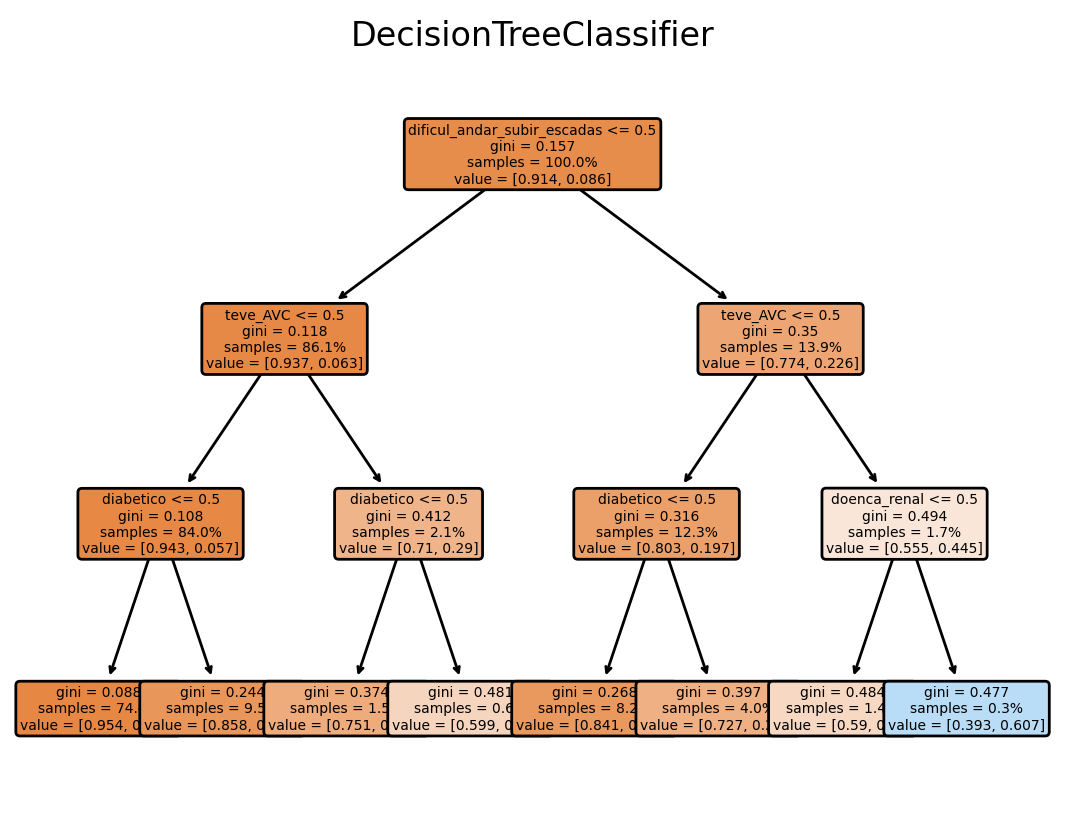

In [167]:
plt.figure(dpi=200)
plot_tree(tree_otimizado, filled=True,feature_names=X.columns,proportion=True, rounded=True, fontsize=5)
plt.title("DecisionTreeClassifier")
plt.show()

# Plotando cada Árvore do Random Forest Classifier

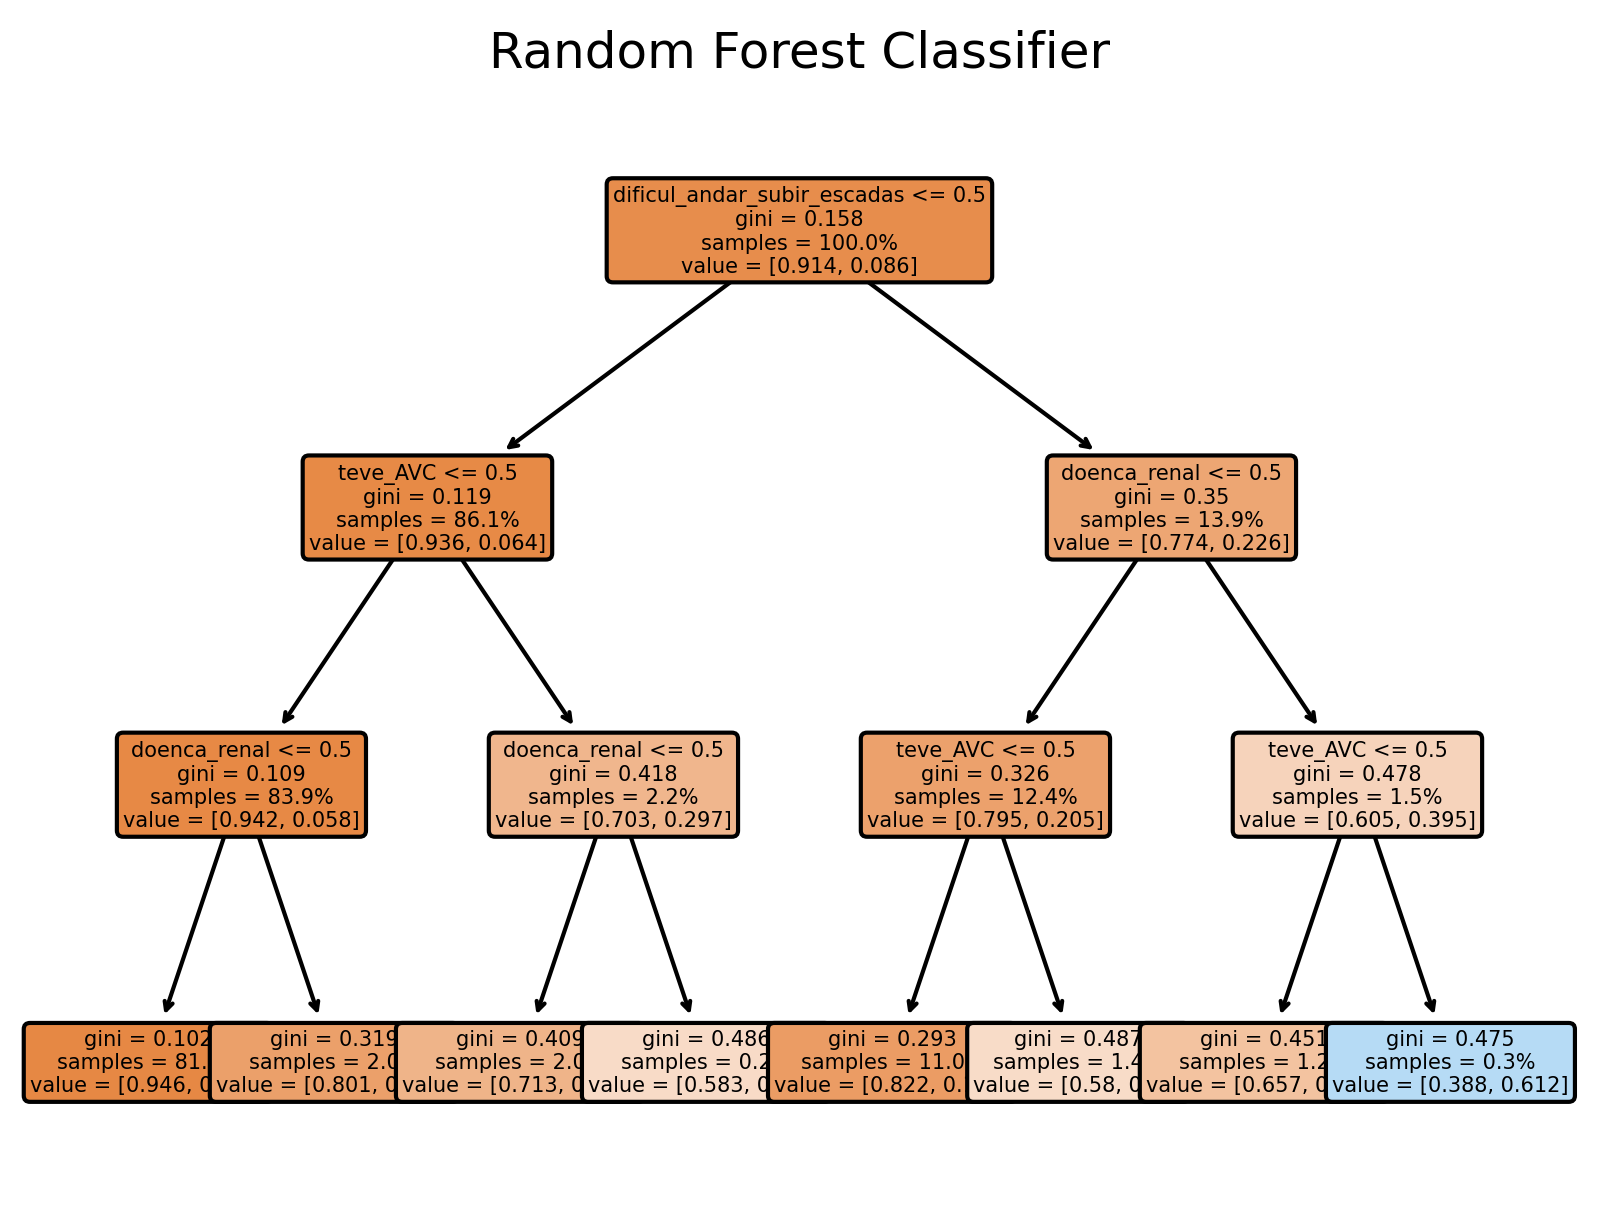

In [168]:
# [0] é a primeira árvore de 100 nesse caso
plt.figure(dpi=300)
plot_tree(RFC_otimizado.estimators_[0], filled=True,feature_names=X.
          columns,proportion=True, rounded=True, fontsize=5)
plt.title("Random Forest Classifier")
plt.show()